# **Deep Reinforcement Learning Class Spring 2025 Assignment 1**

In this assignment, we will learn about gym interface, gridworld, q-learning, and etc. You will need to fill in the missing code snippets (marked by TODO).

Make a copy of this notebook using File > Save a copy in Drive and edit it with your answers.

WARNING: Do not put your name or any other personal identification information in this notebook.

# **Question 1:** Implement and Familiarize Yourself with a Grid World Environment
We will first become familiar with the grid world environment.

In this question, you need to implement a simple 3×3 grid world from scratch. Specifically, you should define functions such as reset(), step(), and render().

Additionally, you should explore and gain familiarity with MiniGrid in OpenAI Gym.

To define your GridWorldEnv.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

class GridWorldEnv:
    def __init__(self, size=5):
        """
        ✅ Grid World Environment
        - `size`: Grid size (default 5x5)
        - `agent_pos`: Initial position (0,0)
        - `goal_pos`: Goal position (size-1, size-1)
        - `reward`: +1 for reaching the goal, -0.1 per step
        """
        self.size = size
        self.agent_pos = [0, 0]  # Start position
        self.goal_pos = [size - 1, size - 1]  # Goal position
        self.done = False

    def reset(self):
        """
        ✅ Reset the environment
        - Reset `agent_pos` to (0,0)
        - Set `done` to False
        - Return the initial state
        """
        # TODO: Reset the agent's position to (0,0)
        self.agent_pos = [0, 0]

        # TODO: Set `done` to False
        self.done = False

        # TODO: Return the initial state as a NumPy array
        return np.zeros((self.size, self.size))

    def step(self, action):
        """
        ✅ Step function (move the agent)
        - `action=0`: Left (←)
        - `action=1`: Right (→)
        - `action=2`: Up (↑)
        - `action=3`: Down (↓)
        - After moving, calculate the reward (+1 for goal, -0.1 per step)
        - If the goal is reached, set `done=True`
        """
        # TODO: Implement movement logic based on the given action
        action_map = {0: [-1, 0], 1: [1, 0], 2: [0, -1], 3: [0, 1]}
        self.agent_pos[0] += action_map[action][0]
        if self.agent_pos[0] < 0:
            self.agent_pos[0] = 0
        elif self.agent_pos[0] >= self.size:
            self.agent_pos[0] = self.size - 1

        self.agent_pos[1] += action_map[action][1]
        if self.agent_pos[1] < 0:
            self.agent_pos[1] = 0
        elif self.agent_pos[1] >= self.size:
            self.agent_pos[1] = self.size - 1

        # TODO: Implement reward logic
        # If the agent reaches the goal, give +1 reward and set `done=True`
        if self.agent_pos == self.goal_pos:
            reward = 1
            self.done = True
        else:
            reward = -1
        # TODO: Return the new state (NumPy array), reward, and `done` status

        return np.zeros((self.size, self.size)), reward, self.done

    def render(self):
        """
        ✅ Render the environment
        - Draw the grid, marking the agent and the goal
        """
        # TODO: Create a grid of zeros with shape (size, size)
        grid = np.zeros((self.size, self.size))

        # TODO: Mark the goal position with 2
        grid[self.goal_pos[0], self.goal_pos[1]] = 2

        # TODO: Mark the agent position with 1
        grid[self.agent_pos[0], self.agent_pos[1]] = 1
        # print(self.agent_pos)
        # TODO: Display the grid using matplotlib
        plt.imshow(grid, cmap='gray')
        plt.show()


This cell of code is designed to verify whether your implementation of the MiniGrid environment is correct.

⚠️ **Do not modify this cell**—any changes will result in a score of **0** for your own GridWorldEnv code above.

🎯 How to Get 10 Points?  
 1️⃣ Run the code below successfully.  
 2️⃣ Observe the agent randomly moving in the 3x3 GridWorld.(3 pts for reset/ 3 pts for render)  
 3️⃣ The agent should reach the goal (🏆) eventually and stop.(4pts for step)  
 4️⃣ If everything works, congratulations! You earned 10 points! 🎉  

🚀 Random Action Agent Starts!


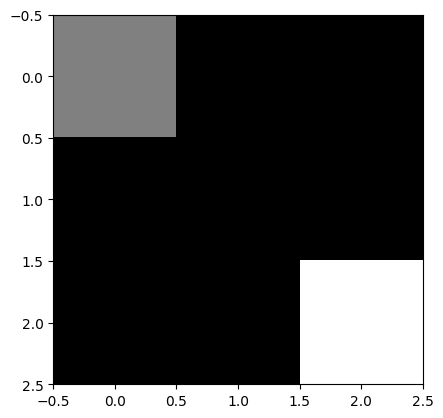

Action: 2, Reward: -1, Done: False


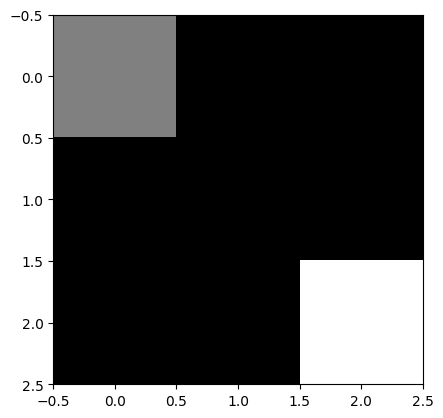

Action: 0, Reward: -1, Done: False


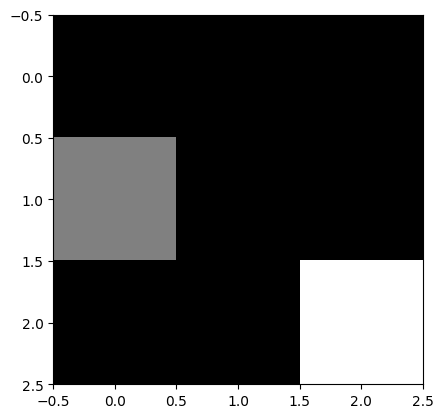

Action: 1, Reward: -1, Done: False


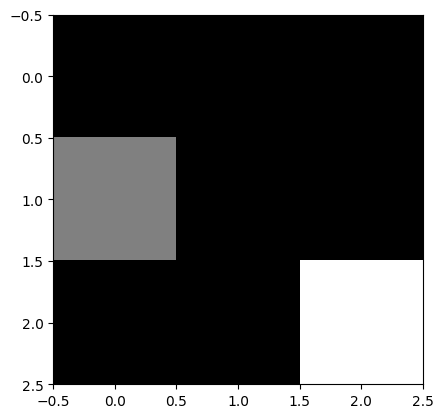

Action: 2, Reward: -1, Done: False


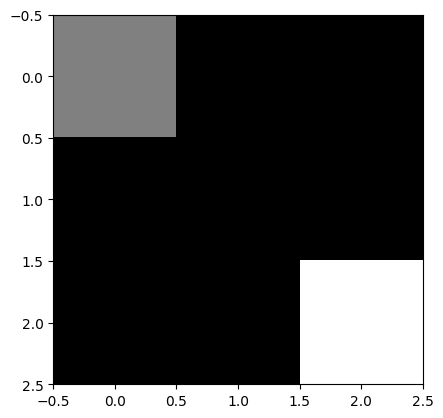

Action: 0, Reward: -1, Done: False


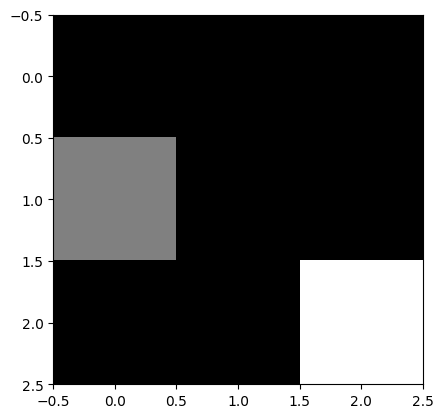

Action: 1, Reward: -1, Done: False


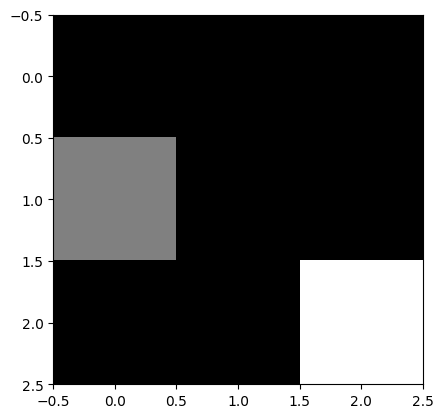

Action: 2, Reward: -1, Done: False


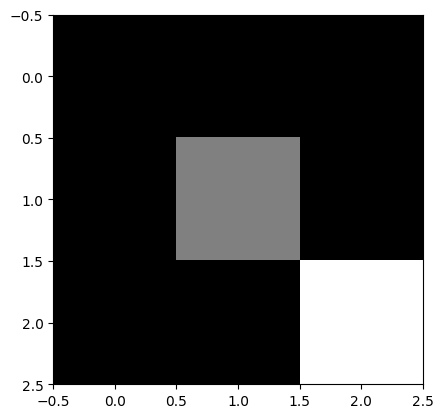

Action: 3, Reward: -1, Done: False


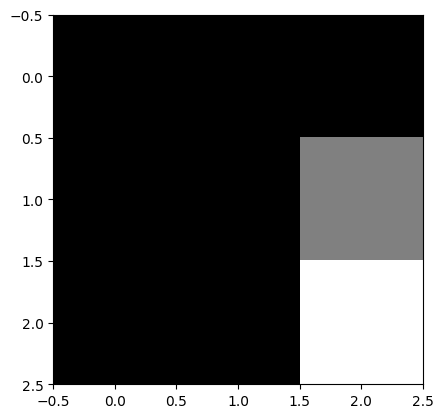

Action: 3, Reward: -1, Done: False


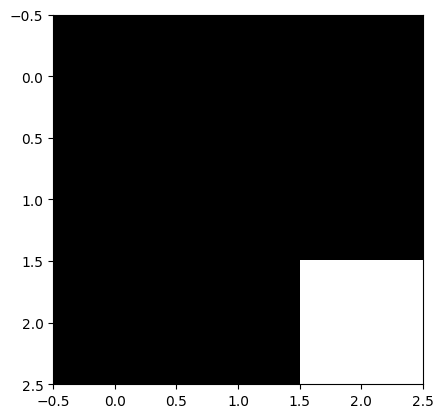

Action: 1, Reward: 1, Done: True


In [2]:
import random

env = GridWorldEnv(size=3)
obs = env.reset()
done = False

print("🚀 Random Action Agent Starts!")
while not done:
    action = random.choice([0, 1, 2, 3])
    obs, reward, done = env.step(action)
    env.render()
    print(f"Action: {action}, Reward: {reward}, Done: {done}")
    time.sleep(0.5)  # Wait for visualization

## **Setup**
Run the following skeleton code to set up the necessary imports and plotting functions.

In [3]:
# !pip install gym-minigrid
import gym
import gym_minigrid
import os
import matplotlib.pyplot as plt
import imageio
import numpy as np
from IPython.display import Image


/home/chunyulin/anaconda3/envs/drl_hw1/lib/python3.10/site-packages/gym/envs/registration.py:307: DeprecationWarning: The package name gym_minigrid has been deprecated in favor of minigrid. Please uninstall gym_minigrid and install minigrid with `pip install minigrid`. Future releases will be maintained under the new package name minigrid.
  fn()


## **Understanding the Gym MiniGrid Environment**
In this section, we will initialize a MiniGrid environment and explore its key properties.

***What is MiniGrid?***

MiniGrid is a lightweight grid world environment designed for reinforcement learning. The agent interacts with the environment by taking actions, receiving observations, and collecting rewards. It serves as an ideal testing ground for developing and evaluating reinforcement learning algorithms.

Simply execute this cell to retrieve key information about the environment.

In [4]:
# setup Environment
env = gym.make("MiniGrid-Empty-8x8-v0")

obs, info = env.reset()
# environment information
print("Action Space:", env.action_space)
print("Observation Keys:", obs.keys())
print("Observation Shape:", obs['image'].shape)

Action Space: Discrete(7)
Observation Keys: dict_keys(['image', 'direction', 'mission'])
Observation Shape: (7, 7, 3)


## **Implementing a Random Agent in MiniGrid**
In this section, you will implement a random agent in the MiniGrid environment. This exercise will help you understand how the agent interacts with the environment by taking actions, receiving rewards, and updating the environment state.

🎯 How to Get 5 Points?  
 1️⃣ Successfully execute the following code.  
 2️⃣ The random agent should move freely in the environment.  
 3️⃣ The animation of the agent’s movement should be generated.  
 4️⃣ The total accumulated reward should be displayed.  
 5️⃣ If everything works correctly, congratulations! You earned 5 points! 🎉  


Total Reward: 0.792578125


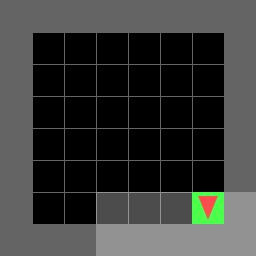

In [7]:
frames = []  # Stores frames for animation

done = False
total_reward = 0  # Tracks total accumulated reward

while not done:
    # TODO: Select an action randomly
    # TODO: Take a step in the environment
    # TODO: Update the total reward
    action = np.random.randint(0, env.action_space.n)
    obs, reward, done, _, _ = env.step(action)
    total_reward += reward
    frame = env.get_frame()
    frames.append(frame)

print("Total Reward:", total_reward)

# Do not modify the follwing code—any changes will result in a score of **0** for this cell.
# gif_path = "/content/minigrid.gif"
gif_path = "minigrid.gif"
imageio.mimsave(gif_path, frames, fps=5)

from IPython.display import Image
Image(filename=gif_path)


Simply execute this cell to explore the available actions that an agent can take in the MiniGrid environment. Understanding these actions will help you better navigate and interact with the environment.

In [6]:
actions = {i: env.actions(i).name for i in range(env.action_space.n)}
print("Available Actions:", actions)

Available Actions: {0: 'left', 1: 'right', 2: 'forward', 3: 'pickup', 4: 'drop', 5: 'toggle', 6: 'done'}


## **Implementing a Rule-Based Agent in MiniGrid**
In this section, you will implement a **simple rule-based agent** to navigate the **MiniGrid environment**. This will help you gain a deeper understanding of **observations**, **actions**, and **rewards** before progressing to **reinforcement learning**.

🎯 How to Get 5 Points?  
 1️⃣ Successfully execute the following code.  
 2️⃣ The rule-based agent should move based on rule in the environment.  
 3️⃣ The animation of the agent’s movement should be generated.  
 4️⃣ The total accumulated reward should be displayed.  
 5️⃣ If everything works correctly, congratulations! You earned 5 points! 🎉  

Total Reward: 0.905078125


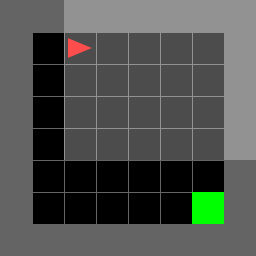

In [8]:
def rule_based_agent(obs):
    """
    ✅ Simple Rule-Based Agent:
    - **Reads the cell in front of the agent**
    - **Turns if a wall is ahead**
    - **Moves forward if the goal is ahead**
    """
    goal_id, wall_id, agent_id = 8, 2, 1
    # TODO: Retrieve the agent's current facing direction
    direction = obs['direction']
    # TODO: Find the agent's position within the observation grid
    grid_size = obs['image'].shape[0]
    agent_pos = [grid_size // 2, grid_size - 1, 0]

    # TODO: Extract the agent's coordinates
    cords = (grid_size // 2, grid_size - 1)

    front_x, front_y = cords[0], cords[1] - 1

    # TODO: Ensure `front_x, front_y` remains within valid grid boundaries
    # Treat any out-of-bounds position as a wall
    if obs['image'][front_x, front_y, 0] == wall_id:
        wall_flag = True
    else:
        wall_flag = False

    # # TODO: Implement decision-making logic
    if wall_flag:
        action = np.random.choice(env.action_space.n)
    else:
        action = 2
    return action
    # return np.random.choice(env.action_space.n)

done = False
total_reward = 0
frames = []
obs, info = env.reset()
while not done:
    action = rule_based_agent(obs)  # 🔥 Execute the rule-based policy
    obs, reward, done, _, _ = env.step(action)
    total_reward += reward
    frame = env.get_frame()
    frames.append(frame)

# Do not modify the follwing code—any changes will result in a score of **0** for this cell.
print("Total Reward:", total_reward)

# gif_path = "/content/minigrid.gif"
gif_path = "minigrid.gif"
imageio.mimsave(gif_path, frames, fps=5)

Image(filename=gif_path)


# **Question 2: Reinforcement Learning with Tabular Methods**

In this section, we will explore **reinforcement learning (RL)** by implementing tabular-based **value learning** and **policy learning** in MiniGrid environments.

You will investigate two fundamental approaches in reinforcement learning:

## **📌 Value-Based Learning (Q-Learning)**
- Uses a **Q-table** to store action-value estimates for each state.
- The agent **updates Q-values** based on rewards received from the environment.
- Helps the agent **learn an optimal policy** by maximizing future rewards.

## **📌 Policy-Based Learning**
- Instead of learning a Q-table, it **learns a direct policy** (i.e., a mapping from states to actions).
- Can be implemented using **tabular-based policy iteration**.
- Helps understand how an agent can **directly optimize its behavior** without relying on Q-values.


## **Value-Based Learning (Q-Learning)**  

- Uses **Q-tables** to store action values for each state.  
- Applies the **Bellman equation** to update Q-values.  
- Implements **ε-greedy exploration** to balance exploration and exploitation.  


 🎯 How to Get 10 Points?  
 1️⃣ Successfully implement Q-learning to train an agent.  
 2️⃣ The agent should learn to navigate the environment using **Q-tables**.(7 points)

 3️⃣ The agent must reach the goal efficiently after training.  
 4️⃣ An animation showing the trained agent reaching the goal should be generated.  (3 points)

 5️⃣ If everything works correctly, congratulations! You earned 10 points! 🎉  


In [9]:
from tqdm import tqdm
def tabular_q_learning(env_name="MiniGrid-Empty-8x8-v0", episodes=5000, alpha=0.05, gamma=0.99,
                       epsilon_start=1.0, epsilon_end=0.1, decay_rate=0.999):
    """
    ✅ Implementing Tabular Q-Learning with Epsilon Decay
    - Uses a **Q-table** to store action values for each state.
    - Updates Q-values using the **Bellman equation**.
    - Implements **ε-greedy exploration** for action selection.
    """
    env = gym.make(env_name, max_episode_steps=10000)

    # TODO: Initialize an empty Q-table to store state-action values.
    q_table = {}
    rewards_per_episode = []

    # TODO: Initialize epsilon for the exploration-exploitation tradeoff.
    epsilon = epsilon_start

    def get_state(env):
        """✅ Extracts the state representation from the MiniGrid environment."""
        # TODO: Represent the state using the agent's position and direction.
        state = (env.agent_pos[0], env.agent_pos[1], env.agent_dir)
        return state

    for episode in tqdm(range(episodes)):
        # TODO: Reset the environment at the beginning of each episode.
        obs, info = env.reset()
        state = get_state(env)
        done = False
        total_reward = 0

        while not done:
            # TODO: Initialize the state in the Q-table if it is not already present.
            if state not in q_table:
                q_table[state] = np.zeros(env.action_space.n)

            # TODO: Implement an ε-greedy policy for action selection.
            if np.random.rand() < epsilon:
                action = np.random.randint(env.action_space.n)  # Explore.
            else:
                action = np.argmax(q_table[state])
            # action_dist = np.ones(env.action_space.n, dtype=float) * epsilon / (env.action_space.n - 1)
            # action_dist[np.argmax(q_table[state])] = 1 - epsilon
            # action = np.random.choice(env.action_space.n, p=action_dist)

            # TODO: Execute the action and observe the next state and reward.
            obs, reward, done, truncated, _ = env.step(action)
            next_state = get_state(env)
            total_reward += reward

            # TODO: Initialize next_state in the Q-table if it is not already present.
            if next_state not in q_table:
                q_table[next_state] = np.zeros(env.action_space.n)


            # TODO: Apply the Q-learning update rule (Bellman equation).
            q_table[state][action] += alpha * (reward + gamma * np.max(q_table[next_state]) - q_table[state][action])

            # TODO: Update the state to the next state.
            state = next_state

            if truncated:
                break

        rewards_per_episode.append(total_reward)

        # TODO: Decay epsilon over time to gradually reduce exploration.
        epsilon = max(epsilon_end, epsilon * decay_rate)

        if (episode + 1) % 100 == 0:
            avg_reward = np.mean(rewards_per_episode[-100:])
            print(f"Episode {episode + 1}/{episodes}, Avg Reward: {avg_reward:.4f}, Epsilon: {epsilon:.3f}")

    env.close()
    return q_table, rewards_per_episode

Train the agent in **MiniGrid-Empty-8x8**.  

⚠️ **You can only adjust the episodes in this cell**—any others changes will result in a score of **0** for your training code above.


 11%|█         | 107/1000 [00:05<00:25, 34.43it/s]

Episode 100/1000, Avg Reward: 0.2420, Epsilon: 0.905


 22%|██▏       | 217/1000 [00:07<00:15, 51.72it/s]

Episode 200/1000, Avg Reward: 0.6016, Epsilon: 0.819


 34%|███▎      | 335/1000 [00:09<00:08, 82.15it/s]

Episode 300/1000, Avg Reward: 0.7684, Epsilon: 0.741


 43%|████▎     | 432/1000 [00:10<00:05, 103.92it/s]

Episode 400/1000, Avg Reward: 0.8402, Epsilon: 0.670


 54%|█████▍    | 541/1000 [00:11<00:03, 130.08it/s]

Episode 500/1000, Avg Reward: 0.8700, Epsilon: 0.606


 63%|██████▎   | 630/1000 [00:11<00:02, 143.50it/s]

Episode 600/1000, Avg Reward: 0.8949, Epsilon: 0.549


 74%|███████▍  | 743/1000 [00:12<00:01, 181.18it/s]

Episode 700/1000, Avg Reward: 0.9096, Epsilon: 0.496


 84%|████████▍ | 845/1000 [00:13<00:00, 199.03it/s]

Episode 800/1000, Avg Reward: 0.9209, Epsilon: 0.449


 95%|█████████▌| 952/1000 [00:13<00:00, 208.89it/s]

Episode 900/1000, Avg Reward: 0.9267, Epsilon: 0.406


100%|██████████| 1000/1000 [00:13<00:00, 72.52it/s]


Episode 1000/1000, Avg Reward: 0.9290, Epsilon: 0.368


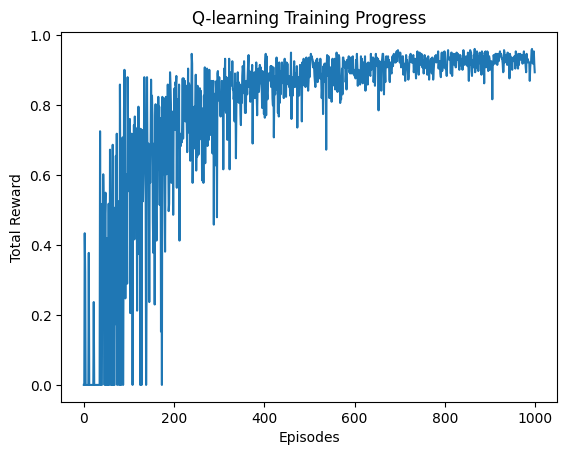

In [10]:
q_table, rewards = tabular_q_learning("MiniGrid-Empty-8x8-v0", episodes=1000)

plt.plot(rewards)
plt.xlabel("Episodes")
plt.ylabel("Total Reward")
plt.title("Q-learning Training Progress")
plt.show()

After training the agent using **Q-learning**, we will now evaluate its performance in the environment.  

This function runs a **single test episode** using the learned **Q-table** and records the agent's movement as a **GIF**.


Total Reward: 0.961328125


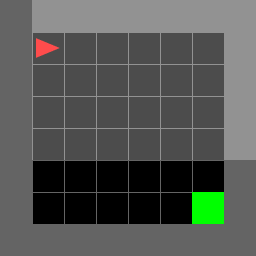

In [12]:
def run_learned_value(env_name, q_table, max_steps=100, gif_path="minigrid_q_learning.gif"): # gif_path="/content/minigrid_q_learning.gif"):
    """
    ✅ Runs a learned Q-table policy in a MiniGrid environment and saves an animation as a GIF.
    :param env_name: (str) Gym environment name.
    :param q_table: (dict) Trained Q-table.
    :param max_steps: (int) Maximum number of steps in the episode.
    :param gif_path: (str) Path to save the generated GIF.
    """
    env = gym.make(env_name, render_mode="rgb_array")
    obs, _ = env.reset()
    # TODO: Retrieve the initial state (agent's position and direction).
    state = (env.agent_pos[0], env.agent_pos[1], env.agent_dir)
    frames = []
    total_reward = 0  # Tracks the total accumulated reward.

    for _ in range(max_steps):
        frames.append(env.get_frame())
        # print("here")
        # TODO: Select an action based on the learned Q-table.
        action = np.argmax(q_table[state])
        # print(action)
        # Execute the chosen action and observe the outcome.
        obs, reward, done, truncated, _ = env.step(action)
        total_reward += reward  # Update the total reward.
        # TODO: Update the agent's state.
        if env_name.find("MiniGrid-Empty") != -1:
            state = (env.agent_pos[0], env.agent_pos[1], env.agent_dir)
        elif env_name.find("MiniGrid-DoorKey") != -1:
            state = (tuple(env.agent_pos), env.agent_dir, env.carrying, door_open)

        if done:
            break
    frames.append(env.get_frame())
    env.close()

# Do not modify the follwing code—any changes will result in a score of **0** for this cell and also your training code above.
    # Save the recorded frames as a GIF.
    imageio.mimsave(gif_path, frames, fps=5)
    print(f"Total Reward: {total_reward}")

    return Image(filename=gif_path)

# ✅ Run the trained agent using the learned value-based policy.
run_learned_value("MiniGrid-Empty-8x8-v0", q_table)

## **Policy-Based Learning**  
- Uses a **policy table** to store action probabilities for each state instead of Q-values.  
- Applies **policy gradient methods** to directly optimize the policy, rather than using the Bellman equation.  
- Uses **softmax action selection**, meaning actions are chosen probabilistically instead of always picking the one with the highest value.  

### **🔑 Key Differences from Value-Based Learning (Q-Learning)**  
| Feature            | Value-Based Learning (Q-Learning) | Policy-Based Learning (Policy Gradient) |
|--------------------|---------------------------------|----------------------------------------|
| **Learning Target** | Learns **Q-values** (action values) | Learns **action probabilities** (policy function) |
| **Action Selection** | Uses **ε-greedy** to choose the best Q-value | Uses **softmax** or a stochastic policy to sample actions |
| **Update Method** | Updates Q-values using the **Bellman equation** | Updates the policy directly using **policy gradients** |
| **Exploration Strategy** | Requires **ε-decay** to balance exploration | Exploration is **inherent** in the policy |
| **Best For** | **Discrete action spaces** (small state spaces) | **Continuous or large action spaces** |

## **📌 Summary**  
- **Q-Learning** learns **what the best action is** by estimating values for each action.  
- **Policy Learning** learns **how to act directly**, optimizing the probability of taking actions.  
- **Policy Learning is better for complex, continuous environments**, while **Value Learning is more efficient in simple, discrete environments**. 🚀


 🎯 How to Get 5 Points?  
 1️⃣ Successfully implement policy learning to train an agent.  
 2️⃣ The agent should learn to navigate the environment using **policy-tables**.  
 3️⃣ The agent must reach the goal efficiently after training. (4 points)
 4️⃣ An animation showing the trained agent reaching the goal should be generated. (1 points)  
 5️⃣ If everything works correctly, congratulations! You earned 5 points! 🎉  

In [13]:
import math

def tabular_policy_learning(env_name="MiniGrid-Empty-8x8-v0", episodes=5000, alpha=0.05, gamma=0.99):
    """
    ✅ Implementing Tabular Policy Learning using Softmax Policy
    - Uses a **policy table** to store action probabilities for each state.
    - Updates policy using a **policy gradient** (REINFORCE-like update).
    - Uses **softmax action selection** for exploration.
    """
    env = gym.make(env_name, max_episode_steps=10000)
    # TODO: Initialize an empty policy table to store action probabilities.
    policy_table = {}
    rewards_per_episode = []

    def get_state(env):
        """✅ Extracts the state representation from the MiniGrid environment."""
        agent_pos = tuple(env.agent_pos)
        direction = env.agent_dir
        return (agent_pos, direction)

    def softmax(x):
        """✅ Compute softmax values for an array."""
        exp_x = np.exp(x - np.max(x))  # Numeric stability
        return exp_x / exp_x.sum()

    for episode in tqdm(range(episodes)):
        obs, _ = env.reset()
        state = get_state(env)
        done = False
        total_reward = 0
        trajectory = []  # Store (state, action, reward) for policy update

        while not done:
            # TODO: Initialize the state in the policy table if it is not already present.
            if state not in policy_table:
                policy_table[state] = np.random.uniform(-0.01, 0.01, env.action_space.n)

            # TODO: Select action using the softmax policy.
            action_dist = softmax(policy_table[state])
            # print(action_dist)
            action = np.random.choice(env.action_space.n, p=action_dist)
            # print(action_probs)

            # TODO: Execute the action and observe the next state and reward.
            obs, reward, done, truncated, _ = env.step(action)
            next_state = get_state(env)
            total_reward += reward

            # Store transition for policy update
            trajectory.append((state, action, reward))

            # Update state
            state = next_state
            if truncated:
                break

        rewards_per_episode.append(total_reward)

        # ✅ **Policy Update (REINFORCE-like)**
        G = 0  # Return (discounted sum of rewards)
        for t in reversed(range(len(trajectory))):
            state, action, reward = trajectory[t]
            G = reward + gamma * G  # Discounted reward

            # TODO: Update policy table using policy gradient
            action_probs = softmax(policy_table[state])
            # print("before", policy_table[state])
            for a in range(env.action_space.n):
                if a == action:
                    policy_table[state][a] += alpha * G * (1 - action_probs[a])
                else:
                    policy_table[state][a] -= alpha * G * action_probs[a]
            # print("after", policy_table[state])

        if (episode + 1) % 100 == 0:
            avg_reward = np.mean(rewards_per_episode[-100:])
            print(f"Episode {episode + 1}/{episodes}, Avg Reward: {avg_reward:.4f}")

    env.close()
    return policy_table, rewards_per_episode


Train the agent in **MiniGrid-Empty-8x8** using **policy learning**.  

⚠️ **You can only adjust the episodes in this cell**—any others changes will result in a score of **0** for your training code above.

  3%|▎         | 104/3000 [00:07<03:33, 13.55it/s]

Episode 100/3000, Avg Reward: 0.1077


  7%|▋         | 204/3000 [00:14<03:14, 14.39it/s]

Episode 200/3000, Avg Reward: 0.1086


 10%|█         | 306/3000 [00:21<02:47, 16.13it/s]

Episode 300/3000, Avg Reward: 0.1426


 14%|█▎        | 405/3000 [00:27<02:47, 15.49it/s]

Episode 400/3000, Avg Reward: 0.1755


 17%|█▋        | 507/3000 [00:33<02:12, 18.85it/s]

Episode 500/3000, Avg Reward: 0.2531


 20%|██        | 606/3000 [00:39<02:01, 19.69it/s]

Episode 600/3000, Avg Reward: 0.2837


 24%|██▎       | 706/3000 [00:44<01:25, 26.72it/s]

Episode 700/3000, Avg Reward: 0.4139


 27%|██▋       | 811/3000 [00:47<01:04, 34.05it/s]

Episode 800/3000, Avg Reward: 0.5433


 30%|███       | 908/3000 [00:51<01:04, 32.45it/s]

Episode 900/3000, Avg Reward: 0.5954


 34%|███▎      | 1010/3000 [00:53<00:44, 44.29it/s]

Episode 1000/3000, Avg Reward: 0.6789


 37%|███▋      | 1112/3000 [00:55<00:41, 45.98it/s]

Episode 1100/3000, Avg Reward: 0.7578


 41%|████      | 1222/3000 [00:57<00:20, 87.78it/s]

Episode 1200/3000, Avg Reward: 0.8000


 44%|████▍     | 1316/3000 [00:58<00:20, 80.52it/s]

Episode 1300/3000, Avg Reward: 0.8459


 48%|████▊     | 1439/3000 [01:00<00:17, 88.71it/s]

Episode 1400/3000, Avg Reward: 0.8419


 51%|█████     | 1522/3000 [01:01<00:19, 77.78it/s]

Episode 1500/3000, Avg Reward: 0.8307


 54%|█████▍    | 1617/3000 [01:02<00:15, 90.04it/s]

Episode 1600/3000, Avg Reward: 0.8725


 59%|█████▉    | 1769/3000 [01:03<00:09, 134.47it/s]

Episode 1700/3000, Avg Reward: 0.8867


 61%|██████▏   | 1844/3000 [01:04<00:09, 124.24it/s]

Episode 1800/3000, Avg Reward: 0.9122


 64%|██████▍   | 1932/3000 [01:04<00:08, 126.74it/s]

Episode 1900/3000, Avg Reward: 0.8969


 67%|██████▋   | 2024/3000 [01:05<00:08, 116.79it/s]

Episode 2000/3000, Avg Reward: 0.8953


 71%|███████   | 2126/3000 [01:06<00:07, 112.38it/s]

Episode 2100/3000, Avg Reward: 0.8920


 74%|███████▍  | 2225/3000 [01:07<00:07, 106.24it/s]

Episode 2200/3000, Avg Reward: 0.8919


 77%|███████▋  | 2314/3000 [01:08<00:05, 136.26it/s]

Episode 2300/3000, Avg Reward: 0.9066


 81%|████████▏ | 2444/3000 [01:08<00:03, 157.52it/s]

Episode 2400/3000, Avg Reward: 0.9177


 85%|████████▍ | 2540/3000 [01:09<00:03, 142.50it/s]

Episode 2500/3000, Avg Reward: 0.9185


 88%|████████▊ | 2645/3000 [01:10<00:02, 123.07it/s]

Episode 2600/3000, Avg Reward: 0.9233


 91%|█████████▏| 2741/3000 [01:11<00:01, 148.19it/s]

Episode 2700/3000, Avg Reward: 0.9095


 95%|█████████▍| 2838/3000 [01:11<00:01, 161.79it/s]

Episode 2800/3000, Avg Reward: 0.9179


 98%|█████████▊| 2948/3000 [01:12<00:00, 159.63it/s]

Episode 2900/3000, Avg Reward: 0.9211


100%|██████████| 3000/3000 [01:12<00:00, 41.30it/s] 


Episode 3000/3000, Avg Reward: 0.9311


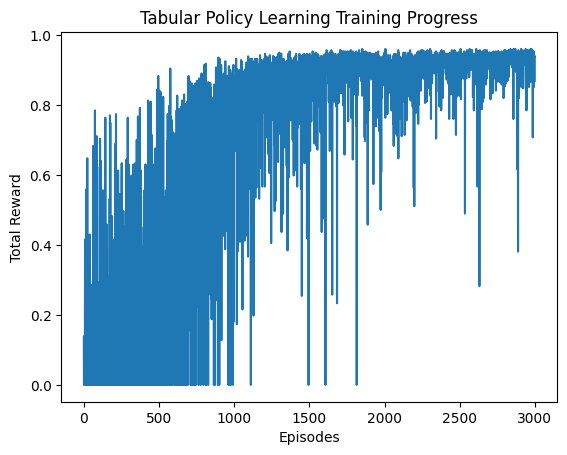

In [14]:
# ✅ Train the agent using policy-based learning.
policy_table, rewards = tabular_policy_learning("MiniGrid-Empty-8x8-v0", episodes=3000)

plt.plot(rewards)
plt.xlabel("Episodes")
plt.ylabel("Total Reward")
plt.title("Tabular Policy Learning Training Progress")
plt.show()

Now that you have trained your agent using **tabular policy learning**, let's visualize its performance in the **MiniGrid environment**.  

This function runs a **test episode** using the learned **policy table (π-table)** and records the agent's movement as a **GIF**.


Total Reward: 0.95078125


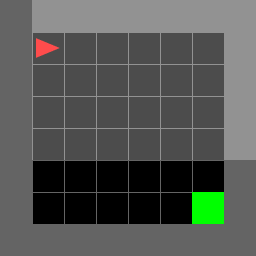

In [15]:
def run_learned_policy(env_name, policy_table, max_steps=100, gif_path="minigrid_q_learning.gif"): #gif_path="/content/minigrid_policy_learning.gif"):
    """
    ✅ Runs a learned policy in a MiniGrid environment and saves an animation GIF.
    """
    env = gym.make(env_name, render_mode="rgb_array")
    obs, _ = env.reset()
    state = (tuple(env.agent_pos), env.agent_dir)

    frames = []
    total_reward = 0  # Track total accumulated reward

    for _ in range(max_steps):
        frames.append(env.get_frame())

        # TODO: Choose an action using the learned policy table
        exp_x = np.exp(policy_table[state] - np.max(policy_table[state]))
        action_probs = exp_x / exp_x.sum()
        action = np.random.choice(env.action_space.n, p=action_probs)


        obs, reward, done, truncated, _ = env.step(action)
        total_reward += reward  # Update total reward
        state = (tuple(env.agent_pos), env.agent_dir)

        if done:
            break

    frames.append(env.get_frame())
    env.close()

# Do not modify the follwing code—any changes will result in a score of **0** for this cell and also your training code above.
    imageio.mimsave(gif_path, frames, fps=5)
    print(f"Total Reward: {total_reward}")


    return Image(filename=gif_path)

# ✅ Run the trained policy
run_learned_policy("MiniGrid-Empty-8x8-v0", policy_table)


In this section, you will train an agent using **Q-learning** in the **MiniGrid-DoorKey-8x8-v0** environment.  

However, you will likely find that the agent **fails to learn efficiently** in this more complex environment.  

You can comment out the training code to avoid retraining the agent every time you run this notebook.


In [14]:
# q_table, rewards = tabular_q_learning("MiniGrid-DoorKey-8x8-v0", episodes=10000, epsilon_start=1.0, epsilon_end=0.1, decay_rate=0.9995)

Now that we have trained an agent using **Q-learning** on **MiniGrid-DoorKey-8x8-v0**, let's evaluate its performance.

You can also comment out this cell.

In [15]:
# ✅ Run the trained value once
# run_learned_value("MiniGrid-DoorKey-8x8-v0", q_table)


## **Reward Shaping**  

If the agent only receives a reward upon reaching the goal, how can it learn that **picking up the key** and **opening the door** are necessary steps?  

This is where **Reward Shaping** comes into play.  

### **📌 What is Reward Shaping?**  
Reward shaping is a technique used in **reinforcement learning (RL)** to provide additional rewards that help guide the agent toward desirable behaviors. Instead of giving a reward only when the agent completes the task, intermediate rewards are introduced to **reinforce progress** toward the goal.  

### **🛠 Why Use Reward Shaping?**  
- **Speeds up learning**: Helps the agent learn useful behaviors more quickly.  
- **Encourages exploration**: Provides incentives for discovering key steps in complex environments.  
- **Reduces sparse reward problems**: Addresses situations where rewards are given only at the end of an episode, making learning difficult.  

### **🎯 Example: Reward Shaping in MiniGrid-DoorKey**  
In **MiniGrid-DoorKey-8x8-v0**, the agent must:  
1. **Find and pick up the key**  
2. **Navigate to the locked door**  
3. **Unlock and pass through the door**  
4. **Reach the goal to receive the final reward**  

Without reward shaping, the agent may struggle to associate picking up the key with reaching the goal.

### **🚀 Key Takeaway**  
Reward shaping **bridges the gap between sparse rewards and effective learning**. It guides the agent by providing structured feedback, helping it navigate complex tasks more efficiently.

🎯 How to Get 15 Points?  
 1️⃣ Successfully implement reward-shaping to train an agent.  
 2️⃣ The agent should learn to navigate the environment using **Q-tables**.

 3️⃣ The agent must reach the goal efficiently after training.  
 4️⃣ An animation showing the trained agent reaching the goal should be generated.  (15 points)

 5️⃣ If everything works correctly, congratulations! You earned 10 points! 🎉  


In [144]:
def run_learned_value(env_name, q_table, max_steps=100, gif_path="minigrid_q_learning.gif"): # gif_path="/content/minigrid_q_learning.gif"):
    """
    ✅ Runs a learned Q-table policy in a MiniGrid environment and saves an animation as a GIF.
    :param env_name: (str) Gym environment name.
    :param q_table: (dict) Trained Q-table.
    :param max_steps: (int) Maximum number of steps in the episode.
    :param gif_path: (str) Path to save the generated GIF.
    """
    def get_state(env, obs, prev_door_open):
        """✅ Extract the agent's state (position, direction, key possession, and door status)."""
        # TODO: Represent the state using agent position, direction, key possession, and door status.
        key_status = True if (env.carrying is not None) and (env.carrying.type == "key") else False

        if prev_door_open == 1:
            return (tuple(env.agent_pos), env.agent_dir, key_status, (0, 0), prev_door_open, (0, 0))

        for i in range(env.grid.width):
            for j in range(env.grid.height):
                obj = env.grid.get(i, j)
                if obj is not None and obj.type == "door":  # Find door
                    door_distance = (i - env.agent_pos[0], j - env.agent_pos[1])
                    if obj.is_open:
                        door_status = 1
                    elif obj.is_locked:
                        door_status = 2
                    else:
                        door_status = 0

        key_pos = np.argwhere(obs['image'][..., 0] == 5)  # Find key in observation grid
        if len(key_pos) == 0 and not key_status:
            key_distance = (10, 10)
        elif key_status:
            key_distance = (0, 0)
        else:
            key_distance = (key_pos[0][0], key_pos[0][1])

        # door_pos = np.argwhere(obs['image'][..., 0] == 4)  # Find door in observation grid
        # if len(door_pos) == 0:
        #     door_distance = (10, 10)
        #     door_status = obs['image'][0, 0, 2]
        # else:
        #     door_distance = (door_pos[0][0], door_pos[0][1])
        #     door_status = obs['image'][door_pos[0][0], door_pos[0][1], 2]

        return (tuple(env.agent_pos), env.agent_dir, key_status, key_distance, door_status, door_distance)



    if env_name.find("MiniGrid-Empty") != -1:
        doorkey_env = False
    elif env_name.find("MiniGrid-DoorKey") != -1:
        doorkey_env = True

    env = gym.make(env_name, render_mode="rgb_array")
    obs, _ = env.reset()
    # TODO: Retrieve the initial state (agent's position and direction).
    state = (env.agent_pos[0], env.agent_pos[1], env.agent_dir) if not doorkey_env else get_state(env, obs, False)
    frames = []
    total_reward = 0  # Tracks the total accumulated reward.
    if doorkey_env:
        prev_has_key = state[2]
        prev_door_open = state[4]

    for _ in range(max_steps):
        frames.append(env.get_frame())
        # TODO: Select an action based on the learned Q-table.
        if doorkey_env:
            if np.random.rand() < 0.1:
                action = np.random.choice(env.action_space.n)
            else:
                try:
                    action = np.argmax(q_table[state])
                except:
                    action = np.random.choice(env.action_space.n)
        else:
            action = np.argmax(q_table[state])
        # Execute the chosen action and observe the outcome.
        obs, reward, done, truncated, _ = env.step(action)
        total_reward += reward  # Update the total reward.
        # TODO: Update the agent's state.
        if not doorkey_env:
            state = (env.agent_pos[0], env.agent_pos[1], env.agent_dir)
        else:
            state = get_state(env, obs, prev_door_open)
            prev_door_open = state[4]
        if done:
            break
    frames.append(env.get_frame())
    env.close()

# Do not modify the follwing code—any changes will result in a score of **0** for this cell and also your training code above.
    # Save the recorded frames as a GIF.
    imageio.mimsave(gif_path, frames, fps=5)
    print(f"Total Reward: {total_reward}")

    return Image(filename=gif_path)

# ✅ Run the trained agent using the learned value-based policy.
# run_learned_value("MiniGrid-Empty-8x8-v0", q_table)

In [ ]:
def tabular_q_learning_adjust(env_name="MiniGrid-DoorKey-5x5-v0", episodes=10000, alpha=0.1, gamma=0.99,
                              epsilon_start=1.0, epsilon_end=0.1, decay_rate=0.9995, reward_shaping=True,
                              q_table=None, debug=False):
    """
    ✅ Implement Tabular Q-learning with Reward Shaping
    - Modify reward shaping to accelerate learning.
    - Adjust epsilon decay to ensure sufficient exploration.
    - Ensure the agent learns the full sequence: "pick up key → open door → reach goal".
    """
    env = gym.make(env_name, max_episode_steps=15000)

    if q_table is None:
        q_table = {}

    rewards_per_episode = []
    epsilon = epsilon_start

    def get_state(env, obs, prev_door_open):
        """✅ Extract the agent's state (position, direction, key possession, and door status)."""
        # TODO: Represent the state using agent position, direction, key possession, and door status.
        key_status = True if (env.carrying is not None) and (env.carrying.type == "key") else False

        if prev_door_open == 1:
            return (tuple(env.agent_pos), env.agent_dir, key_status, (0, 0), prev_door_open, (0, 0))

        for i in range(env.grid.width):
            for j in range(env.grid.height):
                obj = env.grid.get(i, j)
                if obj is not None and obj.type == "door":  # Find door
                    door_distance = (i - env.agent_pos[0], j - env.agent_pos[1])
                    if obj.is_open:
                        door_status = 1
                    elif obj.is_locked:
                        door_status = 2
                    else:
                        door_status = 0

        key_pos = np.argwhere(obs['image'][..., 0] == 5)  # Find key in observation grid
        if len(key_pos) == 0 and not key_status:
            key_distance = (10, 10)
        elif key_status:
            key_distance = (0, 0)
        else:
            key_distance = (key_pos[0][0], key_pos[0][1])

        return (tuple(env.agent_pos), env.agent_dir, key_status, key_distance, door_status, door_distance)

    pickup_rate = 0
    door_open_rate = 0
    success_rate = 0
    for episode in tqdm(range(episodes)):
        obs, _ = env.reset()
        state = get_state(env, obs, False)  # Initially, the door is closed.
        done = False
        total_reward = 0
        prev_has_key = state[2]
        prev_door_open = state[4]
        episode_step = 0
        action_memory = {i: 0 for i in range(env.action_space.n)}
        has_pick_up = False
        timesteps = 0
        while not done:
            # TODO: Initialize the state in the Q-table if not already present.
            if state not in q_table:
                q_table[state] = np.zeros(env.action_space.n)

            # TODO: Implement ε-greedy policy for action selection.
            if np.random.rand() < epsilon:
                action = np.random.choice(env.action_space.n)
            else:
                action = np.argmax(q_table[state])

            if (episode + 1) % 100 == 0:
                action_memory[action] += 1

            # Execute the selected action.
            # prev_carrying = env.carrying
            obs, reward, done, truncated, _ = env.step(action)
            next_state = get_state(env, obs, prev_door_open)
            episode_step += 1
            # ✅ TODO: Implement reward shaping.
            if reward_shaping:

                # Reward shaping for picking up the key
                if not prev_has_key and next_state[2] and not has_pick_up:
                    has_pick_up = 1
                    key_reward = 0.3
                elif prev_has_key and not next_state[2] and next_state[4] != 0:
                    key_reward = -0.5
                else:
                    key_reward = -0.01

                # Reward shaping for opening the door
                if next_state[2]:
                    
                    if (prev_door_open == 2 and next_state[4] == 0) or (prev_door_open == 0 and next_state[4] == 1):
                        door_open_reward = 0.3
                    elif (prev_door_open == 1 and next_state[4] == 0):
                        door_open_reward = -0.5
                    elif next_state[4] != 1:
                        door_open_reward = -0.01
                    else:
                        door_open_reward = 0.0

                else:
                    door_open_reward = -0.01

                if (episode + 1) > 5000 and timesteps > 100:
                    late_penalty = -0.01
                else:
                    late_penalty = 0.0
                shaped_reward = key_reward + door_open_reward + late_penalty

            else:
                shaped_reward = 0.0

            if truncated:
                reward = -5

            # Update total reward.
            reward += shaped_reward
            total_reward += reward


            # TODO: Initialize the next state in the Q-table if not already present.
            if next_state not in q_table:
                q_table[next_state] = np.zeros(env.action_space.n)

            # TODO: Apply Q-learning update rule (Bellman equation).
            q_table[state][action] += alpha * (reward + gamma * np.max(q_table[next_state]) - q_table[state][action])

            # Move to the next state.
            state = next_state
            prev_has_key = state[2]
            prev_door_open = state[4]
            timesteps += 1

            if truncated:
                break

        rewards_per_episode.append(total_reward)
        epsilon = max(epsilon_end, epsilon * decay_rate)
        pickup_rate += int(has_pick_up)
        door_open_rate += int(prev_door_open == 1)
        success_rate += int(not truncated)
        if (episode + 1) % 100 == 0:
            avg_reward = np.mean(rewards_per_episode[-100:])
            avg_pickup_rate = pickup_rate / 100
            avg_door_open_rate = door_open_rate / 100
            avg_success_rate = success_rate / 100
            pickup_rate = 0
            door_open_rate = 0
            success_rate = 0
            print(f"🚀 Episode {episode + 1}/{episodes}, Average Reward: {avg_reward:.2f}, Epsilon: {epsilon:.3f}")
            print(f"action distribution: {action_memory}")
            print(f"Key pick up rate: {avg_pickup_rate}, Door open rate: {avg_door_open_rate}, Success rate: {avg_success_rate}")

    env.close()
    return q_table, rewards_per_episode




Training with reward shapping in the MiniGrid-DoorKey Environment.

⚠️ **You can only adjust the episodes in this cell**—any others changes will result in a score of **0** for your training code above.

🚀 Training MiniGrid-DoorKey-8x8-v0


  1%|          | 100/10000 [00:35<50:53,  3.24it/s]

🚀 Episode 100/10000, Average Reward: -25.36, Epsilon: 0.951
action distribution: {0: 90, 1: 98, 2: 95, 3: 85, 4: 104, 5: 88, 6: 80}
Key pick up rate: 0.9
Door open rate: 0.12
Success rate: 0.03


  2%|▏         | 200/10000 [01:11<50:28,  3.24it/s]

🚀 Episode 200/10000, Average Reward: -25.19, Epsilon: 0.905
action distribution: {0: 109, 1: 97, 2: 75, 3: 98, 4: 76, 5: 87, 6: 98}
Key pick up rate: 0.94
Door open rate: 0.2
Success rate: 0.02


  3%|▎         | 300/10000 [01:43<1:09:21,  2.33it/s]

🚀 Episode 300/10000, Average Reward: -24.97, Epsilon: 0.861
action distribution: {0: 100, 1: 108, 2: 96, 3: 85, 4: 88, 5: 91, 6: 72}
Key pick up rate: 0.96
Door open rate: 0.31
Success rate: 0.09


  4%|▍         | 400/10000 [02:16<52:04,  3.07it/s]

🚀 Episode 400/10000, Average Reward: -25.36, Epsilon: 0.819
action distribution: {0: 114, 1: 108, 2: 83, 3: 81, 4: 90, 5: 78, 6: 86}
Key pick up rate: 0.96
Door open rate: 0.33
Success rate: 0.07


  5%|▌         | 500/10000 [02:49<1:01:26,  2.58it/s]

🚀 Episode 500/10000, Average Reward: -25.17, Epsilon: 0.779
action distribution: {0: 115, 1: 114, 2: 93, 3: 77, 4: 80, 5: 68, 6: 93}
Key pick up rate: 0.99
Door open rate: 0.33
Success rate: 0.14


  6%|▌         | 601/10000 [03:19<39:56,  3.92it/s]

🚀 Episode 600/10000, Average Reward: -24.55, Epsilon: 0.741
action distribution: {0: 97, 1: 95, 2: 92, 3: 106, 4: 82, 5: 77, 6: 91}
Key pick up rate: 1.0
Door open rate: 0.44
Success rate: 0.17


  7%|▋         | 700/10000 [03:49<52:22,  2.96it/s]

🚀 Episode 700/10000, Average Reward: -24.33, Epsilon: 0.705
action distribution: {0: 100, 1: 96, 2: 75, 3: 93, 4: 77, 5: 106, 6: 93}
Key pick up rate: 1.0
Door open rate: 0.43
Success rate: 0.22


  8%|▊         | 800/10000 [04:17<56:15,  2.73it/s]

🚀 Episode 800/10000, Average Reward: -22.39, Epsilon: 0.670
action distribution: {0: 97, 1: 89, 2: 97, 3: 98, 4: 92, 5: 84, 6: 83}
Key pick up rate: 1.0
Door open rate: 0.6
Success rate: 0.37


  9%|▉         | 900/10000 [04:50<37:47,  4.01it/s]

🚀 Episode 900/10000, Average Reward: -23.38, Epsilon: 0.638
action distribution: {0: 62, 1: 66, 2: 62, 3: 56, 4: 47, 5: 55, 6: 50}
Key pick up rate: 1.0
Door open rate: 0.56
Success rate: 0.33


 10%|█         | 1001/10000 [05:17<30:59,  4.84it/s]

🚀 Episode 1000/10000, Average Reward: -21.64, Epsilon: 0.606
action distribution: {0: 94, 1: 83, 2: 86, 3: 108, 4: 81, 5: 96, 6: 92}
Key pick up rate: 1.0
Door open rate: 0.56
Success rate: 0.37


 11%|█         | 1101/10000 [05:41<30:50,  4.81it/s]

🚀 Episode 1100/10000, Average Reward: -18.67, Epsilon: 0.577
action distribution: {0: 70, 1: 70, 2: 68, 3: 101, 4: 64, 5: 64, 6: 58}
Key pick up rate: 1.0
Door open rate: 0.73
Success rate: 0.54


 12%|█▏        | 1201/10000 [06:01<18:22,  7.98it/s]

🚀 Episode 1200/10000, Average Reward: -15.42, Epsilon: 0.549
action distribution: {0: 24, 1: 26, 2: 49, 3: 26, 4: 17, 5: 25, 6: 27}
Key pick up rate: 1.0
Door open rate: 0.77
Success rate: 0.64


 13%|█▎        | 1300/10000 [06:22<31:29,  4.60it/s]

🚀 Episode 1300/10000, Average Reward: -15.65, Epsilon: 0.522
action distribution: {0: 42, 1: 65, 2: 48, 3: 50, 4: 37, 5: 54, 6: 46}
Key pick up rate: 1.0
Door open rate: 0.68
Success rate: 0.59


 14%|█▍        | 1402/10000 [06:43<16:32,  8.66it/s]

🚀 Episode 1400/10000, Average Reward: -14.47, Epsilon: 0.496
action distribution: {0: 87, 1: 94, 2: 176, 3: 73, 4: 70, 5: 80, 6: 60}
Key pick up rate: 1.0
Door open rate: 0.74
Success rate: 0.64


 15%|█▌        | 1502/10000 [07:03<25:28,  5.56it/s]

🚀 Episode 1500/10000, Average Reward: -13.20, Epsilon: 0.472
action distribution: {0: 103, 1: 98, 2: 80, 3: 102, 4: 70, 5: 91, 6: 96}
Key pick up rate: 1.0
Door open rate: 0.77
Success rate: 0.71


 16%|█▌        | 1600/10000 [07:18<28:46,  4.87it/s]

🚀 Episode 1600/10000, Average Reward: -10.81, Epsilon: 0.449
action distribution: {0: 110, 1: 107, 2: 84, 3: 87, 4: 79, 5: 90, 6: 83}
Key pick up rate: 1.0
Door open rate: 0.87
Success rate: 0.79


 17%|█▋        | 1699/10000 [07:33<13:10, 10.49it/s]

🚀 Episode 1700/10000, Average Reward: -9.67, Epsilon: 0.427
action distribution: {0: 71, 1: 96, 2: 213, 3: 65, 4: 61, 5: 71, 6: 63}
Key pick up rate: 1.0
Door open rate: 0.86
Success rate: 0.81


 18%|█▊        | 1800/10000 [07:50<22:21,  6.11it/s]

🚀 Episode 1800/10000, Average Reward: -10.24, Epsilon: 0.406
action distribution: {0: 55, 1: 40, 2: 44, 3: 38, 4: 32, 5: 46, 6: 43}
Key pick up rate: 1.0
Door open rate: 0.89
Success rate: 0.82


 19%|█▉        | 1901/10000 [08:05<23:51,  5.66it/s]

🚀 Episode 1900/10000, Average Reward: -8.21, Epsilon: 0.387
action distribution: {0: 106, 1: 91, 2: 79, 3: 91, 4: 83, 5: 92, 6: 98}
Key pick up rate: 1.0
Door open rate: 0.93
Success rate: 0.88


 20%|██        | 2002/10000 [08:18<22:54,  5.82it/s]

🚀 Episode 2000/10000, Average Reward: -6.96, Epsilon: 0.368
action distribution: {0: 27, 1: 37, 2: 25, 3: 35, 4: 13, 5: 29, 6: 29}
Key pick up rate: 1.0
Door open rate: 0.94
Success rate: 0.92


 21%|██        | 2099/10000 [08:28<15:29,  8.50it/s]

🚀 Episode 2100/10000, Average Reward: -5.42, Epsilon: 0.350
action distribution: {0: 0, 1: 1, 2: 7, 3: 2, 4: 0, 5: 2, 6: 1}
Key pick up rate: 1.0
Door open rate: 0.95
Success rate: 0.91


 22%|██▏       | 2200/10000 [08:37<11:50, 10.97it/s]

🚀 Episode 2200/10000, Average Reward: -4.85, Epsilon: 0.333
action distribution: {0: 62, 1: 65, 2: 41, 3: 59, 4: 47, 5: 48, 6: 64}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 0.95


 23%|██▎       | 2301/10000 [08:46<08:45, 14.65it/s]

🚀 Episode 2300/10000, Average Reward: -4.37, Epsilon: 0.317
action distribution: {0: 32, 1: 26, 2: 31, 3: 28, 4: 23, 5: 24, 6: 26}
Key pick up rate: 1.0
Door open rate: 0.99
Success rate: 0.92


 24%|██▍       | 2403/10000 [08:54<13:17,  9.53it/s]

🚀 Episode 2400/10000, Average Reward: -3.49, Epsilon: 0.301
action distribution: {0: 13, 1: 11, 2: 19, 3: 15, 4: 8, 5: 20, 6: 17}
Key pick up rate: 1.0
Door open rate: 0.97
Success rate: 0.95


 25%|██▌       | 2501/10000 [09:00<08:21, 14.95it/s]

🚀 Episode 2500/10000, Average Reward: -2.14, Epsilon: 0.286
action distribution: {0: 59, 1: 49, 2: 284, 3: 58, 4: 33, 5: 80, 6: 77}
Key pick up rate: 1.0
Door open rate: 0.99
Success rate: 0.96


 26%|██▌       | 2602/10000 [09:05<07:34, 16.29it/s]

🚀 Episode 2600/10000, Average Reward: -1.87, Epsilon: 0.272
action distribution: {0: 19, 1: 25, 2: 25, 3: 22, 4: 31, 5: 28, 6: 22}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 1.0


 27%|██▋       | 2701/10000 [09:12<05:04, 23.98it/s]

🚀 Episode 2700/10000, Average Reward: -2.59, Epsilon: 0.259
action distribution: {0: 8, 1: 8, 2: 14, 3: 11, 4: 4, 5: 8, 6: 7}
Key pick up rate: 0.99
Door open rate: 0.99
Success rate: 0.97


 28%|██▊       | 2801/10000 [09:17<05:18, 22.60it/s]

🚀 Episode 2800/10000, Average Reward: -1.85, Epsilon: 0.247
action distribution: {0: 1, 1: 3, 2: 12, 3: 4, 4: 1, 5: 2, 6: 4}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 0.97


 29%|██▉       | 2901/10000 [09:24<06:48, 17.39it/s]

🚀 Episode 2900/10000, Average Reward: -2.52, Epsilon: 0.234
action distribution: {0: 91, 1: 112, 2: 79, 3: 87, 4: 91, 5: 76, 6: 104}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 0.95


 30%|███       | 3007/10000 [09:28<05:23, 21.59it/s]

🚀 Episode 3000/10000, Average Reward: -1.54, Epsilon: 0.223
action distribution: {0: 6, 1: 6, 2: 14, 3: 8, 4: 1, 5: 7, 6: 7}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 0.96


 31%|███       | 3108/10000 [09:34<04:08, 27.77it/s]

🚀 Episode 3100/10000, Average Reward: -1.52, Epsilon: 0.212
action distribution: {0: 2, 1: 10, 2: 23, 3: 2, 4: 2, 5: 4, 6: 4}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 0.98


 32%|███▏      | 3204/10000 [09:38<04:04, 27.79it/s]

🚀 Episode 3200/10000, Average Reward: -0.88, Epsilon: 0.202
action distribution: {0: 5, 1: 7, 2: 16, 3: 2, 4: 2, 5: 6, 6: 3}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 1.0


 33%|███▎      | 3303/10000 [09:41<04:00, 27.86it/s]

🚀 Episode 3300/10000, Average Reward: -0.58, Epsilon: 0.192
action distribution: {0: 3, 1: 1, 2: 6, 3: 1, 4: 1, 5: 2, 6: 2}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 0.99


 34%|███▍      | 3407/10000 [09:47<04:31, 24.31it/s]

🚀 Episode 3400/10000, Average Reward: -1.33, Epsilon: 0.183
action distribution: {0: 4, 1: 12, 2: 20, 3: 17, 4: 12, 5: 12, 6: 12}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 0.97


 35%|███▌      | 3503/10000 [09:51<03:23, 31.88it/s]

🚀 Episode 3500/10000, Average Reward: -1.12, Epsilon: 0.174
action distribution: {0: 10, 1: 9, 2: 15, 3: 8, 4: 4, 5: 8, 6: 7}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 0.98


 36%|███▌      | 3608/10000 [09:54<03:00, 35.37it/s]

🚀 Episode 3600/10000, Average Reward: -0.51, Epsilon: 0.165
action distribution: {0: 2, 1: 5, 2: 6, 3: 1, 4: 4, 5: 2, 6: 1}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 0.98


 37%|███▋      | 3708/10000 [10:01<03:15, 32.24it/s]

🚀 Episode 3700/10000, Average Reward: -0.56, Epsilon: 0.157
action distribution: {0: 14, 1: 15, 2: 17, 3: 14, 4: 3, 5: 13, 6: 10}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 0.98


 38%|███▊      | 3805/10000 [10:04<03:04, 33.62it/s]

🚀 Episode 3800/10000, Average Reward: -0.21, Epsilon: 0.149
action distribution: {0: 8, 1: 3, 2: 13, 3: 4, 4: 1, 5: 5, 6: 3}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 0.99


 39%|███▉      | 3906/10000 [10:08<03:09, 32.16it/s]

🚀 Episode 3900/10000, Average Reward: -0.44, Epsilon: 0.142
action distribution: {0: 4, 1: 6, 2: 11, 3: 3, 4: 3, 5: 3, 6: 1}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 0.99


 40%|████      | 4005/10000 [10:11<03:15, 30.74it/s]

🚀 Episode 4000/10000, Average Reward: 0.16, Epsilon: 0.135
action distribution: {0: 0, 1: 2, 2: 10, 3: 1, 4: 0, 5: 2, 6: 1}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 1.0


 41%|████      | 4112/10000 [10:14<02:41, 36.36it/s]

🚀 Episode 4100/10000, Average Reward: -0.59, Epsilon: 0.129
action distribution: {0: 11, 1: 14, 2: 16, 3: 12, 4: 7, 5: 6, 6: 9}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 0.98


 42%|████▏     | 4205/10000 [10:17<02:41, 35.84it/s]

🚀 Episode 4200/10000, Average Reward: -0.12, Epsilon: 0.122
action distribution: {0: 1, 1: 2, 2: 10, 3: 2, 4: 1, 5: 2, 6: 1}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 0.99


 43%|████▎     | 4315/10000 [10:20<02:32, 37.26it/s]

🚀 Episode 4300/10000, Average Reward: -0.01, Epsilon: 0.116
action distribution: {0: 4, 1: 6, 2: 13, 3: 10, 4: 9, 5: 9, 6: 8}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 1.0


 44%|████▍     | 4408/10000 [10:23<02:45, 33.80it/s]

🚀 Episode 4400/10000, Average Reward: 0.16, Epsilon: 0.111
action distribution: {0: 2, 1: 3, 2: 9, 3: 1, 4: 0, 5: 1, 6: 0}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 1.0


 45%|████▌     | 4515/10000 [10:26<02:06, 43.19it/s]

🚀 Episode 4500/10000, Average Reward: 0.22, Epsilon: 0.105
action distribution: {0: 10, 1: 9, 2: 18, 3: 6, 4: 6, 5: 7, 6: 7}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 1.0


 46%|████▌     | 4606/10000 [10:28<02:04, 43.46it/s]

🚀 Episode 4600/10000, Average Reward: 0.29, Epsilon: 0.100
action distribution: {0: 0, 1: 4, 2: 10, 3: 1, 4: 0, 5: 1, 6: 0}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 1.0


 47%|████▋     | 4710/10000 [10:30<01:37, 54.32it/s]

🚀 Episode 4700/10000, Average Reward: 0.21, Epsilon: 0.100
action distribution: {0: 5, 1: 6, 2: 10, 3: 6, 4: 6, 5: 6, 6: 5}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 0.99


 48%|████▊     | 4810/10000 [10:32<02:11, 39.39it/s]

🚀 Episode 4800/10000, Average Reward: 0.22, Epsilon: 0.100
action distribution: {0: 2, 1: 3, 2: 13, 3: 1, 4: 0, 5: 1, 6: 2}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 0.99


 49%|████▉     | 4903/10000 [10:35<02:18, 36.68it/s]

🚀 Episode 4900/10000, Average Reward: -0.01, Epsilon: 0.100
action distribution: {0: 6, 1: 9, 2: 12, 3: 9, 4: 9, 5: 13, 6: 8}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 0.98


 50%|█████     | 5008/10000 [10:38<01:30, 55.31it/s]

🚀 Episode 5000/10000, Average Reward: -0.08, Epsilon: 0.100
action distribution: {0: 8, 1: 2, 2: 12, 3: 2, 4: 1, 5: 2, 6: 0}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 0.98


 51%|█████     | 5108/10000 [10:40<01:40, 48.48it/s]

🚀 Episode 5100/10000, Average Reward: 0.21, Epsilon: 0.100
action distribution: {0: 12, 1: 12, 2: 54, 3: 9, 4: 8, 5: 11, 6: 8}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 0.99


 52%|█████▏    | 5202/10000 [10:43<02:59, 26.68it/s]

🚀 Episode 5200/10000, Average Reward: -0.05, Epsilon: 0.100
action distribution: {0: 1, 1: 2, 2: 6, 3: 1, 4: 0, 5: 1, 6: 1}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 0.99


 53%|█████▎    | 5311/10000 [10:45<01:50, 42.43it/s]

🚀 Episode 5300/10000, Average Reward: 0.09, Epsilon: 0.100
action distribution: {0: 19, 1: 16, 2: 9, 3: 2, 4: 0, 5: 1, 6: 1}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 0.99


 54%|█████▍    | 5406/10000 [10:47<01:29, 51.14it/s]

🚀 Episode 5400/10000, Average Reward: 0.53, Epsilon: 0.100
action distribution: {0: 1, 1: 5, 2: 16, 3: 6, 4: 3, 5: 4, 6: 2}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 1.0


 55%|█████▌    | 5514/10000 [10:51<01:19, 56.78it/s]

🚀 Episode 5500/10000, Average Reward: 0.20, Epsilon: 0.100
action distribution: {0: 6, 1: 21, 2: 13, 3: 8, 4: 7, 5: 5, 6: 7}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 0.99


 56%|█████▌    | 5606/10000 [10:52<01:22, 53.19it/s]

🚀 Episode 5600/10000, Average Reward: 0.45, Epsilon: 0.100
action distribution: {0: 2, 1: 2, 2: 11, 3: 1, 4: 0, 5: 1, 6: 0}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 0.99


 57%|█████▋    | 5711/10000 [10:55<01:46, 40.43it/s]

🚀 Episode 5700/10000, Average Reward: 0.21, Epsilon: 0.100
action distribution: {0: 5, 1: 7, 2: 13, 3: 3, 4: 2, 5: 3, 6: 0}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 0.99


 58%|█████▊    | 5807/10000 [10:56<01:08, 61.65it/s]

🚀 Episode 5800/10000, Average Reward: 0.42, Epsilon: 0.100
action distribution: {0: 3, 1: 2, 2: 10, 3: 4, 4: 4, 5: 5, 6: 2}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 1.0


 59%|█████▉    | 5910/10000 [10:59<01:17, 52.77it/s]

🚀 Episode 5900/10000, Average Reward: 0.04, Epsilon: 0.100
action distribution: {0: 1, 1: 9, 2: 13, 3: 4, 4: 3, 5: 3, 6: 6}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 0.98


 60%|██████    | 6007/10000 [11:01<01:37, 40.86it/s]

🚀 Episode 6000/10000, Average Reward: 0.36, Epsilon: 0.100
action distribution: {0: 3, 1: 3, 2: 11, 3: 1, 4: 2, 5: 2, 6: 2}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 1.0


 61%|██████    | 6111/10000 [11:04<01:10, 54.91it/s]

🚀 Episode 6100/10000, Average Reward: 0.08, Epsilon: 0.100
action distribution: {0: 4, 1: 2, 2: 11, 3: 1, 4: 0, 5: 2, 6: 0}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 0.99


 62%|██████▏   | 6215/10000 [11:07<01:02, 60.41it/s]

🚀 Episode 6200/10000, Average Reward: -0.13, Epsilon: 0.100
action distribution: {0: 1, 1: 4, 2: 14, 3: 2, 4: 1, 5: 3, 6: 1}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 0.97


 63%|██████▎   | 6310/10000 [11:08<01:01, 60.15it/s]

🚀 Episode 6300/10000, Average Reward: 0.39, Epsilon: 0.100
action distribution: {0: 1, 1: 3, 2: 12, 3: 1, 4: 0, 5: 1, 6: 0}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 1.0


 64%|██████▍   | 6414/10000 [11:10<00:58, 61.12it/s]

🚀 Episode 6400/10000, Average Reward: 0.34, Epsilon: 0.100
action distribution: {0: 0, 1: 2, 2: 7, 3: 1, 4: 0, 5: 1, 6: 0}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 0.99


 65%|██████▌   | 6509/10000 [11:13<01:16, 45.61it/s]

🚀 Episode 6500/10000, Average Reward: 0.07, Epsilon: 0.100
action distribution: {0: 1, 1: 1, 2: 7, 3: 1, 4: 0, 5: 1, 6: 0}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 0.98


 66%|██████▌   | 6611/10000 [11:16<02:05, 27.00it/s]

🚀 Episode 6600/10000, Average Reward: 0.05, Epsilon: 0.100
action distribution: {0: 4, 1: 5, 2: 14, 3: 6, 4: 4, 5: 3, 6: 5}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 0.98


 67%|██████▋   | 6718/10000 [11:18<00:55, 58.94it/s]

🚀 Episode 6700/10000, Average Reward: 0.04, Epsilon: 0.100
action distribution: {0: 3, 1: 1, 2: 9, 3: 2, 4: 2, 5: 1, 6: 0}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 0.98


 68%|██████▊   | 6810/10000 [11:20<00:57, 55.88it/s]

🚀 Episode 6800/10000, Average Reward: 0.34, Epsilon: 0.100
action distribution: {0: 5, 1: 4, 2: 16, 3: 1, 4: 1, 5: 2, 6: 0}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 0.99


 69%|██████▉   | 6907/10000 [11:21<00:49, 62.58it/s]

🚀 Episode 6900/10000, Average Reward: 0.66, Epsilon: 0.100
action distribution: {0: 2, 1: 2, 2: 8, 3: 1, 4: 0, 5: 1, 6: 0}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 1.0


 70%|███████   | 7011/10000 [11:23<01:04, 46.24it/s]

🚀 Episode 7000/10000, Average Reward: 0.47, Epsilon: 0.100
action distribution: {0: 1, 1: 2, 2: 8, 3: 1, 4: 0, 5: 1, 6: 0}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 0.99


 71%|███████   | 7117/10000 [11:25<00:44, 65.00it/s]

🚀 Episode 7100/10000, Average Reward: 0.63, Epsilon: 0.100
action distribution: {0: 2, 1: 3, 2: 8, 3: 1, 4: 0, 5: 1, 6: 0}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 1.0


 72%|███████▏  | 7203/10000 [11:27<01:15, 37.10it/s]

🚀 Episode 7200/10000, Average Reward: 0.15, Epsilon: 0.100
action distribution: {0: 1, 1: 2, 2: 10, 3: 1, 4: 2, 5: 1, 6: 0}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 0.98


 73%|███████▎  | 7308/10000 [11:29<00:44, 60.24it/s]

🚀 Episode 7300/10000, Average Reward: 0.34, Epsilon: 0.100
action distribution: {0: 3, 1: 4, 2: 14, 3: 4, 4: 0, 5: 4, 6: 2}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 0.99


 74%|███████▍  | 7417/10000 [11:31<00:36, 70.01it/s]

🚀 Episode 7400/10000, Average Reward: 0.28, Epsilon: 0.100
action distribution: {0: 0, 1: 3, 2: 6, 3: 2, 4: 0, 5: 1, 6: 0}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 0.99


 75%|███████▌  | 7507/10000 [11:33<00:40, 62.15it/s]

🚀 Episode 7500/10000, Average Reward: 0.70, Epsilon: 0.100
action distribution: {0: 2, 1: 2, 2: 13, 3: 1, 4: 0, 5: 1, 6: 0}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 1.0


 76%|███████▌  | 7605/10000 [11:34<00:30, 77.70it/s]

🚀 Episode 7600/10000, Average Reward: 0.74, Epsilon: 0.100
action distribution: {0: 4, 1: 3, 2: 12, 3: 2, 4: 1, 5: 1, 6: 1}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 1.0


 77%|███████▋  | 7714/10000 [11:36<00:44, 51.06it/s]

🚀 Episode 7700/10000, Average Reward: 0.16, Epsilon: 0.100
action distribution: {0: 0, 1: 3, 2: 10, 3: 2, 4: 0, 5: 1, 6: 2}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 0.98


 78%|███████▊  | 7810/10000 [11:38<00:40, 54.48it/s]

🚀 Episode 7800/10000, Average Reward: -0.18, Epsilon: 0.100
action distribution: {0: 1, 1: 4, 2: 7, 3: 2, 4: 0, 5: 2, 6: 0}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 0.97


 79%|███████▉  | 7905/10000 [11:41<00:53, 38.89it/s]

🚀 Episode 7900/10000, Average Reward: 0.47, Epsilon: 0.100
action distribution: {0: 3, 1: 2, 2: 10, 3: 3, 4: 2, 5: 5, 6: 3}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 0.99


 80%|████████  | 8003/10000 [11:43<00:37, 53.40it/s]

🚀 Episode 8000/10000, Average Reward: 0.44, Epsilon: 0.100
action distribution: {0: 0, 1: 3, 2: 9, 3: 1, 4: 0, 5: 1, 6: 0}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 1.0


 81%|████████  | 8114/10000 [11:45<00:31, 60.45it/s]

🚀 Episode 8100/10000, Average Reward: 0.26, Epsilon: 0.100
action distribution: {0: 1, 1: 3, 2: 11, 3: 1, 4: 0, 5: 1, 6: 0}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 0.99


 82%|████████▏ | 8212/10000 [11:46<00:33, 53.09it/s]

🚀 Episode 8200/10000, Average Reward: 0.29, Epsilon: 0.100
action distribution: {0: 1, 1: 3, 2: 9, 3: 3, 4: 2, 5: 2, 6: 0}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 0.98


 83%|████████▎ | 8311/10000 [11:48<00:28, 59.71it/s]

🚀 Episode 8300/10000, Average Reward: 0.60, Epsilon: 0.100
action distribution: {0: 1, 1: 2, 2: 7, 3: 1, 4: 0, 5: 1, 6: 0}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 1.0


 84%|████████▍ | 8410/10000 [11:49<00:25, 62.84it/s]

🚀 Episode 8400/10000, Average Reward: 0.66, Epsilon: 0.100
action distribution: {0: 5, 1: 1, 2: 7, 3: 1, 4: 0, 5: 1, 6: 0}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 1.0


 85%|████████▌ | 8505/10000 [11:51<00:33, 44.32it/s]

🚀 Episode 8500/10000, Average Reward: 0.27, Epsilon: 0.100
action distribution: {0: 3, 1: 4, 2: 13, 3: 2, 4: 2, 5: 7, 6: 2}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 0.99


 86%|████████▌ | 8613/10000 [11:54<00:23, 59.61it/s]

🚀 Episode 8600/10000, Average Reward: 0.63, Epsilon: 0.100
action distribution: {0: 2, 1: 4, 2: 6, 3: 1, 4: 0, 5: 1, 6: 1}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 1.0


 87%|████████▋ | 8717/10000 [11:55<00:17, 75.11it/s]

🚀 Episode 8700/10000, Average Reward: 0.70, Epsilon: 0.100
action distribution: {0: 2, 1: 3, 2: 10, 3: 1, 4: 0, 5: 2, 6: 1}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 1.0


 88%|████████▊ | 8816/10000 [11:57<00:18, 63.93it/s]

🚀 Episode 8800/10000, Average Reward: 0.41, Epsilon: 0.100
action distribution: {0: 3, 1: 2, 2: 9, 3: 1, 4: 0, 5: 1, 6: 0}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 0.99


 89%|████████▉ | 8920/10000 [11:59<00:12, 84.45it/s]

🚀 Episode 8900/10000, Average Reward: 0.69, Epsilon: 0.100
action distribution: {0: 2, 1: 2, 2: 12, 3: 3, 4: 1, 5: 1, 6: 1}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 1.0


 90%|█████████ | 9008/10000 [12:00<00:15, 63.94it/s]

🚀 Episode 9000/10000, Average Reward: 0.54, Epsilon: 0.100
action distribution: {0: 5, 1: 8, 2: 13, 3: 4, 4: 4, 5: 5, 6: 5}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 0.99


 91%|█████████ | 9105/10000 [12:02<00:13, 67.00it/s]

🚀 Episode 9100/10000, Average Reward: 0.44, Epsilon: 0.100
action distribution: {0: 2, 1: 3, 2: 9, 3: 1, 4: 0, 5: 3, 6: 0}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 0.99


 92%|█████████▏| 9213/10000 [12:04<00:13, 57.47it/s]

🚀 Episode 9200/10000, Average Reward: 0.30, Epsilon: 0.100
action distribution: {0: 3, 1: 6, 2: 13, 3: 2, 4: 2, 5: 2, 6: 3}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 0.98


 93%|█████████▎| 9297/10000 [12:06<00:13, 50.56it/s]

🚀 Episode 9300/10000, Average Reward: 0.54, Epsilon: 0.100
action distribution: {0: 69, 1: 69, 2: 264, 3: 41, 4: 53, 5: 70, 6: 74}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 0.99


 94%|█████████▍| 9424/10000 [12:08<00:08, 64.89it/s]

🚀 Episode 9400/10000, Average Reward: 0.20, Epsilon: 0.100
action distribution: {0: 1, 1: 1, 2: 7, 3: 1, 4: 1, 5: 1, 6: 1}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 0.98


 95%|█████████▌| 9520/10000 [12:10<00:07, 63.09it/s]

🚀 Episode 9500/10000, Average Reward: 0.03, Epsilon: 0.100
action distribution: {0: 1, 1: 3, 2: 9, 3: 2, 4: 0, 5: 1, 6: 0}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 0.97


 96%|█████████▌| 9608/10000 [12:11<00:05, 65.69it/s]

🚀 Episode 9600/10000, Average Reward: 0.67, Epsilon: 0.100
action distribution: {0: 0, 1: 4, 2: 9, 3: 3, 4: 0, 5: 2, 6: 0}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 1.0


 97%|█████████▋| 9707/10000 [12:13<00:05, 53.55it/s]

🚀 Episode 9700/10000, Average Reward: 0.37, Epsilon: 0.100
action distribution: {0: 5, 1: 8, 2: 11, 3: 10, 4: 7, 5: 4, 6: 5}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 0.99


 98%|█████████▊| 9814/10000 [12:15<00:03, 51.75it/s]

🚀 Episode 9800/10000, Average Reward: 0.47, Epsilon: 0.100
action distribution: {0: 6, 1: 9, 2: 13, 3: 6, 4: 2, 5: 3, 6: 5}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 1.0


 99%|█████████▉| 9905/10000 [12:17<00:02, 45.27it/s]

🚀 Episode 9900/10000, Average Reward: 0.39, Epsilon: 0.100
action distribution: {0: 3, 1: 2, 2: 9, 3: 1, 4: 1, 5: 1, 6: 0}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 0.99


100%|██████████| 10000/10000 [12:19<00:00, 13.51it/s]


🚀 Episode 10000/10000, Average Reward: 0.51, Epsilon: 0.100
action distribution: {0: 2, 1: 1, 2: 8, 3: 1, 4: 0, 5: 1, 6: 0}
Key pick up rate: 1.0
Door open rate: 1.0
Success rate: 1.0


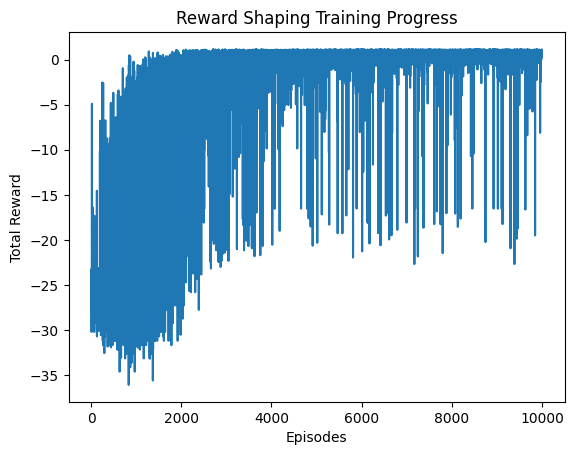

In [136]:
# ✅ Run the training.
print("🚀 Training MiniGrid-DoorKey-8x8-v0")
q_table, rewards = tabular_q_learning_adjust("MiniGrid-DoorKey-8x8-v0", episodes=10000)
plt.plot(rewards)
plt.xlabel("Episodes")
plt.ylabel("Total Reward")
plt.title("Reward Shaping Training Progress")
plt.show()

Now that you have trained your agent using reward shaping, let's visualize its performance in the **MiniGrid-DoorKey Environment**.  
⚠️ Do not modify this cell—any changes will result in a score of 0 for your training code above.

Total Reward: 0.97609375


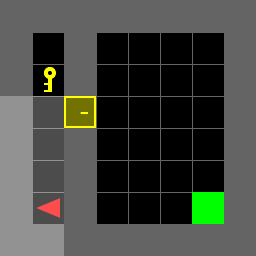

In [164]:
run_learned_value("MiniGrid-DoorKey-8x8-v0", q_table, max_steps=100)

# **Question 3: Implementing Tabular Learning with PyTorch**  

So far, we have implemented **Tabular Q-learning** using **NumPy** to store and update the Q-table.  
However, in real-world **reinforcement learning**, deep learning frameworks like **PyTorch** are often used to handle **large state spaces** and optimize learning.  

In this question, we will still use **tabular learning**, but instead of **NumPy**, we will implement **Q-learning** and **Policy Learning** using **PyTorch**.  


✅ **Q-Learning Implementation (10 Points)**  
- Correctly implements **Q-learning using PyTorch tensors** instead of NumPy.  
- Successfully **trains the agent** and **demonstrates an animation of reaching the goal**.  

✅ **Policy Learning Implementation (10 Points)**  
- Correctly implements **policy-based learning using PyTorch**, including a **softmax policy**.  
- Successfully **trains the agent** and **demonstrates an animation of reaching the goal**.  

🚀 **Full Score (20 Points)**: If both Q-learning and Policy Learning are implemented correctly and the agent **successfully reaches the goal**, you have **earned all 20 points! 🎉**  

In [ ]:
from logging import logProcesses
import torch
import torch.nn as nn
import torch.optim as optim

def get_agent_state(env):
    """
    ✅ Extract the agent's state as (x, y) position and direction.
    """
    x, y = env.agent_pos  # Directly retrieve the agent's position.
    direction = env.agent_dir  # Retrieve the agent's current direction.
    return (x, y, direction)  # Return state as (x, y, direction).

class PyTorchQTable:
    def __init__(self, state_size, action_size, lr=0.1):
        """
        ✅ PyTorch Q-table Implementation.
        - Stores Q-values as a PyTorch tensor.
        - Uses gradient-based updates instead of direct assignment.
        - Optimizes learning using **Mean Squared Error (MSE)**.
        """
        self.state_size = state_size
        self.action_size = action_size

        # ✅ TODO: Initialize the Q-table as a PyTorch tensor.
        self.q_table = nn.Parameter(torch.rand((*state_size, action_size), requires_grad=True) * 0.01)
        # print(self.q_table.shape)

        # ✅ TODO: Use **Stochastic Gradient Descent (SGD)** or **Adam** for optimization.
        self.optimizer = optim.Adam([self.q_table], lr=lr)

        # ✅ TODO: Use **Mean Squared Error (MSE) loss** for training.
        self.loss_fn = nn.MSELoss()

    def update(self, state, action, target):
        """
        ✅ Update the Q-value using PyTorch optimization.
        """
        self.optimizer.zero_grad()

        # ✅ TODO: Retrieve the current Q-value.
        print("current q", self.q_table[state])
        current_q = self.q_table[state][action]
        # print(current_q, target)

        target = target.detach()
        # ✅ TODO: Compute the **MSE loss**.
        loss = self.loss_fn(current_q.unsqueeze(0), target.unsqueeze(0))
        # print(current_q, target, loss)

        # ✅ TODO: Perform **backpropagation**.
        loss.requires_grad = True
        loss.backward()

        # ✅ TODO: Perform **gradient descent**.
        self.optimizer.step()


    def get_action(self, state, epsilon):
        """
        ✅ Implements **ε-greedy action selection**.
        """
        if np.random.rand() < epsilon:
            return np.random.choice(self.action_size)  # Explore.
        else:
            with torch.no_grad():  # ✅ Ensure no gradient tracking
                return torch.argmax(self.q_table[state]).item()  # Exploit.



def train_pytorch_q_learning(env_name="MiniGrid-Empty-8x8-v0", episodes=5000, alpha=0.05, gamma=0.99,
                             epsilon_start=1.0, epsilon_end=0.1, decay_rate=0.9995):
    """
    ✅ Train a Q-learning agent using **PyTorch tensors**.
    """
    env = gym.make(env_name, max_episode_steps=10000)
    state_size = (env.width, env.height, 4)  # (x, y, direction).
    action_size = env.action_space.n

    q_table = PyTorchQTable(state_size, action_size, lr=alpha)
    epsilon = epsilon_start
    rewards_per_episode = []
    for episode in tqdm(range(episodes)):
        obs, _ = env.reset()

        # Retrieve the agent's state directly from the environment.
        state = get_agent_state(env)

        done = False
        total_reward = 0
        total_loss = 0
        prev_q_table = q_table.q_table.clone().detach()
        while not done:
        #✅ TODO: Implement Q-learning using PyTorch Q-table.
            action = q_table.get_action(state, epsilon)
            obs, reward, done, truncated, _ = env.step(action)
            total_reward += reward
            next_state = get_agent_state(env)
            # if truncated:
            #     reward = -1

            with torch.no_grad():
                max_next_q = torch.max(q_table.q_table[next_state]).detach()
                target = reward + gamma * max_next_q
                print("target q", q_table.q_table[next_state], target)
            q_table.update(state, action, target)
            # total_loss += loss
            # print(f"Updated Q-value for state {state}, action {action}: {q_table.q_table[state][action].item()}")
            state = next_state

            if truncated:
                q_table.q_table = prev_q_table.clone().requires_grad_(True)
                # print((q_table.q_table == prev_q_table).all())
                break
        # Decay epsilon over time to reduce exploration.
        epsilon = max(epsilon_end, epsilon * decay_rate)
        rewards_per_episode.append(total_reward)
        # Print progress every 100 episodes.
        if (episode + 1) % 100 == 0:
            avg_reward = np.mean(rewards_per_episode[-100:])
            print(f"Episode {episode + 1}/{episodes}, Avg Reward: {avg_reward:.4f}, Epsilon: {epsilon:.3f}")
            # print(f"Episode {episode + 1}/{episodes}, Total Reward: {total_reward}, Epsilon: {epsilon:.3f}")

    env.close()
    return q_table


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

def get_agent_state(env):
    """
    ✅ Extract the agent's state as (x, y) position and direction.
    """
    x, y = env.agent_pos  # Directly retrieve the agent's position.
    direction = env.agent_dir  # Retrieve the agent's current direction.
    return (x, y, direction)  # Return state as (x, y, direction).

class PyTorchQTable:
    def __init__(self, state_size, action_size, lr=0.1):
        """
        ✅ PyTorch Q-table Implementation.
        - Stores Q-values as a PyTorch tensor.
        - Uses gradient-based updates instead of direct assignment.
        - Optimizes learning using **Mean Squared Error (MSE)**.
        """
        self.state_size = state_size
        self.action_size = action_size

        # ✅ TODO: Initialize the Q-table as a PyTorch tensor.
        self.q_table = torch.zeros((*state_size, action_size), dtype=torch.float32, requires_grad=True)
        temp_q_table = self.q_table.clone()  # Create a copy to avoid in-place modification
        temp_q_table[:,:,:,4:] = -10  # Modify the copy
        self.q_table = nn.Parameter(temp_q_table, requires_grad=True)  # Assign the modified copy back

        # ✅ TODO: Use **Stochastic Gradient Descent (SGD)** or **Adam** for optimization.
        self.optimizer = optim.SGD([self.q_table], lr=lr)

        # ✅ TODO: Use **Mean Squared Error (MSE) loss** for training.
        self.loss_fn = nn.MSELoss()

    def update(self, state, action, target):
        """
        ✅ Update the Q-value using PyTorch optimization.
        """
        self.optimizer.zero_grad()

        # ✅ TODO: Retrieve the current Q-value.
        q_value = self.q_table[state][action]

        # ✅ TODO: Compute the **MSE loss**.
        loss = self.loss_fn(q_value, torch.tensor(target, dtype=torch.float32))

        # ✅ TODO: Perform **backpropagation**.
        loss.backward()

        # ✅ TODO: Perform **gradient descent**.
        self.optimizer.step()

    def get_action(self, state, epsilon):
        """
        ✅ Implements **ε-greedy action selection**.
        """
        if np.random.rand() < epsilon:
            return np.random.choice(self.action_size)  # Explore.
        else:
            return torch.argmax(self.q_table[state]).item()  # Exploit.



def train_pytorch_q_learning(env_name="MiniGrid-Empty-8x8-v0", episodes=5000, alpha=0.05, gamma=0.9,
                             epsilon_start=1.0, epsilon_end=0.1, decay_rate=0.999):
    # The default parameters should allow learning, but you can still adjust them to achieve better training performance.
    """
    ✅ Train a Q-learning agent using **PyTorch tensors**.
    """
    env = gym.make(env_name)
    state_size = (env.width, env.height, 4)  # (x, y, direction).
    action_size = env.action_space.n

    q_table = PyTorchQTable(state_size, action_size, lr=alpha)
    epsilon = epsilon_start
    rewards_per_episode = []

    for episode in tqdm(range(episodes)):
        obs, _ = env.reset()

        # Retrieve the agent's state directly from the environment.
        state = get_agent_state(env)

        done = False
        total_reward = 0

        while not done:
        #✅ TODO: Implement Q-learning using PyTorch Q-table.
            action = q_table.get_action(state, epsilon)
            obs, reward, done, truncated, _ = env.step(action)
            next_state = get_agent_state(env)

            # Compute target Q-value using Bellman equation
            target = reward + (gamma * torch.max(q_table.q_table[next_state]))

            # Update Q-table using PyTorch optimizer
            q_table.update(state, action, target)

            state = next_state
            total_reward += reward
            if truncated:
                break

        rewards_per_episode.append(total_reward)

        # TODO: Decay epsilon over time to gradually reduce exploration.
        # if total_reward > 0.3:
        epsilon = max(epsilon_end, epsilon * decay_rate)

        if (episode + 1) % 100 == 0:
            avg_reward = np.mean(rewards_per_episode[-100:])
            print(f"Episode {episode + 1}/{episodes}, Avg Reward: {avg_reward}, Epsilon: {epsilon:.3f}")
            # print(f"Episode {episode + 1}/{episodes}, Total Reward: {total_reward}, Epsilon: {epsilon:.3f}")

    env.close()
    return q_table

Train the agent in MiniGrid-Empty-8x8 with PyTorch Q-learning.

⚠️ **You can only adjust the episodes in this cell**—any others changes will result in a score of **0** for your training code above.

In [ ]:
print("🚀 Training PyTorch Q-learning on MiniGrid-Empty-8x8")
q_table = train_pytorch_q_learning("MiniGrid-Empty-8x8-v0", episodes=2000)

🚀 Training PyTorch Q-learning on MiniGrid-Empty-8x8


  0%|          | 0/2000 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
<ipython-input-26-6e7b32727197>:46: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  loss = self.loss_fn(q_value, torch.tensor(target, dtype=torch.float32))
  5%|▌         | 101/2000 [00:18<03:36,  8.79it/s]

Episode 100/2000, Avg Reward: 0.20196093750000002, Epsilon: 0.905


 10%|█         | 203/2000 [00:26<01:47, 16.67it/s]

Episode 200/2000, Avg Reward: 0.6602343749999998, Epsilon: 0.819


 15%|█▌        | 305/2000 [00:31<00:54, 30.99it/s]

Episode 300/2000, Avg Reward: 0.7888164062500002, Epsilon: 0.741


 20%|██        | 404/2000 [00:35<01:01, 25.87it/s]

Episode 400/2000, Avg Reward: 0.8414453124999999, Epsilon: 0.670


 25%|██▌       | 504/2000 [00:37<00:42, 35.61it/s]

Episode 500/2000, Avg Reward: 0.8743867187499998, Epsilon: 0.606


 30%|███       | 606/2000 [00:40<00:30, 46.27it/s]

Episode 600/2000, Avg Reward: 0.89681640625, Epsilon: 0.549


 36%|███▌      | 710/2000 [00:42<00:23, 55.97it/s]

Episode 700/2000, Avg Reward: 0.90687109375, Epsilon: 0.496


 40%|████      | 809/2000 [00:44<00:21, 54.19it/s]

Episode 800/2000, Avg Reward: 0.9160820312499999, Epsilon: 0.449


 45%|████▌     | 905/2000 [00:46<00:25, 42.60it/s]

Episode 900/2000, Avg Reward: 0.9222343750000002, Epsilon: 0.406


 51%|█████     | 1011/2000 [00:48<00:15, 63.09it/s]

Episode 1000/2000, Avg Reward: 0.9240273437500001, Epsilon: 0.368


 56%|█████▌    | 1110/2000 [00:49<00:13, 68.39it/s]

Episode 1100/2000, Avg Reward: 0.9341875000000001, Epsilon: 0.333


 61%|██████    | 1214/2000 [00:51<00:10, 75.05it/s]

Episode 1200/2000, Avg Reward: 0.9364726562500002, Epsilon: 0.301


 66%|██████▌   | 1311/2000 [00:52<00:09, 75.61it/s]

Episode 1300/2000, Avg Reward: 0.9399882812499999, Epsilon: 0.272


 70%|███████   | 1409/2000 [00:53<00:07, 77.56it/s]

Episode 1400/2000, Avg Reward: 0.943046875, Epsilon: 0.246


 75%|███████▌  | 1509/2000 [00:54<00:05, 84.23it/s]

Episode 1500/2000, Avg Reward: 0.9442070312500002, Epsilon: 0.223


 81%|████████  | 1611/2000 [00:56<00:04, 88.01it/s]

Episode 1600/2000, Avg Reward: 0.9471601562499999, Epsilon: 0.202


 86%|████████▌ | 1714/2000 [00:57<00:03, 87.43it/s]

Episode 1700/2000, Avg Reward: 0.9467031249999998, Epsilon: 0.183


 90%|█████████ | 1809/2000 [00:58<00:02, 65.02it/s]

Episode 1800/2000, Avg Reward: 0.94821484375, Epsilon: 0.165


 96%|█████████▌| 1912/2000 [01:00<00:01, 83.96it/s]

Episode 1900/2000, Avg Reward: 0.9487421875, Epsilon: 0.149


100%|██████████| 2000/2000 [01:01<00:00, 32.65it/s]

Episode 2000/2000, Avg Reward: 0.9495507812500001, Epsilon: 0.135


Total Reward: 0.9578125


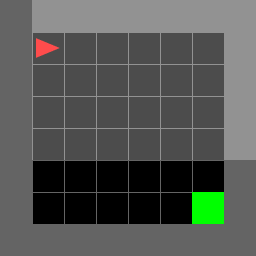

In [ ]:
def run_pytorch_q_learning(env_name="MiniGrid-Empty-8x8-v0", q_table=None, max_steps=100, gif_path="minigrid_q_learning.gif"): #gif_path="/content/minigrid_q_learning.gif"):
    """
    ✅ Runs a trained PyTorch Q-learning agent and visualizes its performance.
    - Executes a single test episode using the trained **Q-table**.
    - Saves the agent's movement as a **GIF**.

    :param env_name: (str) Name of the MiniGrid environment.
    :param q_table: (PyTorchQTable) Trained Q-table from PyTorch Q-learning.
    :param max_steps: (int) Maximum steps allowed in the episode.
    :param gif_path: (str) File path to save the GIF.
    """
    env = gym.make(env_name, render_mode="rgb_array")
    obs, _ = env.reset()
    state = get_agent_state(env)  # ✅ Retrieve the agent's initial state.

    frames = []
    total_reward = 0

    for _ in range(max_steps):
        frames.append(env.get_frame())  # ✅ Capture the environment frame for visualization.

        # ✅ Select an action using the trained Q-table (exploitation).
        action = q_table.get_action(state, epsilon=0)  # Greedy action selection.
        # ✅ Execute the action in the environment.
        obs, reward, done, truncated, _ = env.step(action)
        total_reward += reward  # ✅ Accumulate total reward.
        state = get_agent_state(env)  # ✅ Update the agent's state.

        if done:
            break  # ✅ Stop if the goal is reached.

    frames.append(env.get_frame())
    env.close()
# Do not modify the code below—any changes will result in a score of 0 for your training code above.
    # ✅ Save the frames as a GIF to visualize the agent's behavior.
    imageio.mimsave(gif_path, frames, fps=5)
    print(f"Total Reward: {total_reward}")

    return Image(filename=gif_path)

run_pytorch_q_learning("MiniGrid-Empty-8x8-v0", q_table)


Instead of directly updating **Q-values**, we will now train an explicit **policy** using **Softmax Policy Gradients**.  

### **📌 What is Softmax Policy Gradient?**  
In **value-based reinforcement learning** (e.g., Q-learning), an agent **learns a Q-table** that estimates the value of each action in a given state. However, instead of storing and updating Q-values, **policy-based methods** directly learn a **policy** that maps states to actions.  

The **Softmax Policy Gradient** approach uses a **probabilistic policy representation**, where action selection is based on a **Softmax function** applied to policy scores. This enables the agent to explore actions **proportionally to their estimated effectiveness**, rather than always selecting the highest-value action.  

### **🛠 How Does It Work?**  
1. **The policy is represented by a probability distribution** over actions for each state.  
2. **The agent selects an action using Softmax probabilities**, rather than choosing greedily based on a Q-table.  
3. **The policy is updated using gradient ascent**, optimizing a loss function (e.g., Cross-Entropy Loss).  
4. **The agent improves its action selection strategy over time** by reinforcing actions that lead to higher rewards.  

### **🎯 Why Use Softmax Policy Gradients?**  
- ✅ **Handles large state spaces** more effectively than tabular Q-learning.  
- ✅ **Encourages exploration** by selecting actions probabilistically instead of always taking the best-known action.  
- ✅ **More suitable for stochastic environments**, where actions should not always be deterministic.  
- ✅ **Lays the foundation for deep policy-based RL**, such as REINFORCE and Actor-Critic methods.  

In this section, we will implement **policy learning** using **PyTorch** and train the agent using the **Softmax Policy Gradient method**.


In [ ]:
class PyTorchPolicy:
    def __init__(self, state_size, action_size, lr=0.1):
        """
        ✅ Implements a Softmax Policy using PyTorch.
        - Stores action probabilities as a PyTorch tensor.
        - Uses **Cross-Entropy Loss** for learning.
        """
        self.state_size = state_size
        self.action_size = action_size

        # ✅ TODO: Initialize the policy tensor.
        self.policy = nn.Parameter(torch.rand((*state_size, action_size), requires_grad=True) * 0.01)

        # ✅ TODO: Use **Adam optimizer** for policy optimization.
        self.optimizer = optim.Adam([self.policy], lr=lr)

        # ✅ TODO: Use **Cross-Entropy Loss** for training.
        self.loss_fn = nn.CrossEntropyLoss()

    def get_action(self, state):
        """
        ✅ Sample an action based on **Softmax probabilities**.
        """
        # ✅ TODO: Compute softmax probabilities over available actions.
        probs = torch.softmax(self.policy[state], dim=0)

        # ✅ TODO: Sample an action based on the computed probabilities.
        action = torch.multinomial(probs, 1).item()
        return action

    def update(self, state, action, reward):
        """
        ✅ Update the policy using **Cross-Entropy Loss**.
        """
        self.optimizer.zero_grad()

        # ✅ TODO: Convert action to a tensor for loss calculation.
        action_tensor = torch.tensor([action])

        # ✅ TODO: Compute **Cross-Entropy Loss**.
        loss = self.loss_fn(self.policy[state].unsqueeze(0), action_tensor) * reward

        # ✅ TODO: Perform **backpropagation**.
        loss.backward()

        # ✅ TODO: Perform **gradient descent optimization**.
        self.optimizer.step()



def train_pytorch_policy_learning(env_name="MiniGrid-Empty-8x8-v0", episodes=5000, alpha=0.05, gamma=0.99):
    """
    ✅ Train Policy Learning using **Softmax Policy Gradient**.
    - Stores policy probabilities using **PyTorch tensors**.
    - Updates policy using **Cross-Entropy Loss**.
    - Optimizes policy using **Adam**.
    """
    env = gym.make(env_name)
    state_size = (env.width, env.height, 4)  # (x, y, direction).
    action_size = env.action_space.n

    policy_model = PyTorchPolicy(state_size, action_size, lr=alpha)
    for episode in tqdm(range(episodes)):
        obs, _ = env.reset()

        # Retrieve the agent's state directly from the environment.
        state = get_agent_state(env)

        done = False
        total_reward = 0
        trajectory = []  # Store (state, action, reward) for policy update
        # ✅ TODO: Implement Policy Learning.
        while not done:
            action = policy_model.get_action(state)
            obs, reward, done, truncated, _ = env.step(action)
            next_state = get_agent_state(env)
            total_reward += reward
            trajectory.append((state, action, reward))
            state = next_state
            if truncated:
                break


        G = 0  # Return (discounted sum of rewards)
        for t in reversed(range(len(trajectory))):
            state, action, reward = trajectory[t]
            G = reward + gamma * G  # Discounted reward

            policy_model.update(state, action, G)

        # Print progress every 1000 episodes.
        if (episode + 1) % 100 == 0:
            print(f"Episode {episode + 1}/{episodes}, Total Reward: {total_reward}")

    env.close()
    return policy_model


Train the agent in MiniGrid-Empty-8x8 with PyTorch policy learning.

⚠️ **You can only adjust the episodes in this cell**—any others changes will result in a score of **0** for your training code above.

In [ ]:
print("🚀 Training PyTorch Policy Learning on MiniGrid-Empty-8x8")
policy_model = train_pytorch_policy_learning("MiniGrid-Empty-8x8-v0", episodes=2000)

🚀 Training PyTorch Policy Learning on MiniGrid-Empty-8x8


  6%|▌         | 111/2000 [00:09<00:41, 45.51it/s]

Episode 100/2000, Total Reward: 0.94375


 10%|█         | 209/2000 [00:11<00:33, 54.01it/s]

Episode 200/2000, Total Reward: 0.90859375


 15%|█▌        | 307/2000 [00:13<00:26, 62.94it/s]

Episode 300/2000, Total Reward: 0.947265625


 21%|██        | 411/2000 [00:15<00:20, 76.25it/s]

Episode 400/2000, Total Reward: 0.947265625


 26%|██▌       | 515/2000 [00:16<00:19, 76.42it/s]

Episode 500/2000, Total Reward: 0.947265625


 31%|███       | 611/2000 [00:17<00:18, 76.89it/s]

Episode 600/2000, Total Reward: 0.947265625


 36%|███▌      | 715/2000 [00:19<00:16, 75.89it/s]

Episode 700/2000, Total Reward: 0.947265625


 40%|████      | 809/2000 [00:20<00:16, 72.69it/s]

Episode 800/2000, Total Reward: 0.947265625


 46%|████▌     | 913/2000 [00:21<00:14, 75.65it/s]

Episode 900/2000, Total Reward: 0.947265625


 51%|█████     | 1015/2000 [00:23<00:14, 68.52it/s]

Episode 1000/2000, Total Reward: 0.947265625


 55%|█████▌    | 1105/2000 [00:25<00:15, 58.66it/s]

Episode 1100/2000, Total Reward: 0.940234375


 60%|██████    | 1206/2000 [00:27<00:14, 53.77it/s]

Episode 1200/2000, Total Reward: 0.926171875


 65%|██████▌   | 1307/2000 [00:28<00:09, 72.57it/s]

Episode 1300/2000, Total Reward: 0.940234375


 70%|███████   | 1409/2000 [00:29<00:08, 67.67it/s]

Episode 1400/2000, Total Reward: 0.94375


 76%|███████▌  | 1513/2000 [00:31<00:06, 75.45it/s]

Episode 1500/2000, Total Reward: 0.947265625


 80%|████████  | 1609/2000 [00:32<00:05, 77.48it/s]

Episode 1600/2000, Total Reward: 0.947265625


 86%|████████▌ | 1713/2000 [00:33<00:03, 77.65it/s]

Episode 1700/2000, Total Reward: 0.947265625


 90%|█████████ | 1809/2000 [00:35<00:02, 77.51it/s]

Episode 1800/2000, Total Reward: 0.947265625


 96%|█████████▌| 1913/2000 [00:36<00:01, 77.38it/s]

Episode 1900/2000, Total Reward: 0.947265625


100%|██████████| 2000/2000 [00:37<00:00, 53.13it/s]

Episode 2000/2000, Total Reward: 0.947265625


Now that you have trained your agent using **PyTorch policy learning**, let's visualize its performance in the **MiniGrid environment**.  

This function runs a **test episode** using the learned **policy table (π-table)** and records the agent's movement as a **GIF**.

⚠️ Do not modify this cell—any changes will result in a score of 0 for your training code above.


🚀 Running PyTorch Policy Learning agent
Total Reward: 0.947265625


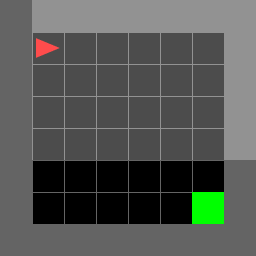

In [ ]:
def run_pytorch_policy_learning(env_name, policy_model, max_steps=100, gif_path="minigrid_policy_learning.gif"): #gif_path="/content/minigrid_policy_learning.gif"):
    """
    ✅ Run a trained PyTorch Policy agent and save a GIF
    """
    env = gym.make(env_name, render_mode="rgb_array")
    obs, _ = env.reset()
    state = get_agent_state(env)
    frames = []
    total_reward = 0

    for _ in range(max_steps):
        frames.append(env.get_frame())

        action = policy_model.get_action(state)  # Select action using learned policy
        obs, reward, done, truncated, _ = env.step(action)
        total_reward += reward
        state = get_agent_state(env)

        if done:
            break
    frames.append(env.get_frame())
    env.close()

    # Save GIF
    imageio.mimsave(gif_path, frames, fps=5)
    print(f"Total Reward: {total_reward}")

    # Display GIF
    return Image(filename=gif_path)

# ✅ Run the trained policy agent
print("🚀 Running PyTorch Policy Learning agent")
run_pytorch_policy_learning("MiniGrid-Empty-8x8-v0", policy_model)
